## Advanced Regression - Surprise Housing

### 
1) Read and Understand the data
2) Data Exploration
Univariate Analysis
Bivariate Analysis
3) Feature Engineering
4) Data Preprocessing
Missing Value Treatment
Dummy Variable Creation
Outlier Treatment
5) Model Building, Tuning & Evaluation
Split the Data into Dependent and Independent variables
Train - Test Split
Scaling numerical columns
<br>Model 1: Ridge Regression
<br>Model 2: Lasso


In [726]:
## Import requisite libraries

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import Ridge, Lasso

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import r2_score, mean_squared_error
from sklearn import preprocessing  

In [727]:
## Suppress warnings
import warnings
warnings.filterwarnings("ignore")


In [728]:
## Set display limits
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


### 1.Reading and Understanding Data

In [1]:
## Load the csv file
# reading the dataset
house = pd.read_csv("train.csv",keep_default_na=False)

NameError: name 'pd' is not defined

In [730]:
house.shape

(1460, 81)

The House data has 1460 rows and 81 columns

In [731]:
house.head()

Id  MSSubClass MSZoning LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL          65     8450   Pave    NA      Reg   
1   2          20       RL          80     9600   Pave    NA      Reg   
2   3          60       RL          68    11250   Pave    NA      IR1   
3   4          70       RL          60     9550   Pave    NA      IR1   
4   5          60       RL          84    14260   Pave    NA      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0        196        Gd        TA      PConc       Gd       TA           No   
1          0        TA        TA     CBlock       Gd       TA           Gd   
2        162        Gd        TA      PConc       Gd       TA           Mn   
3          0        TA        TA     BrkTil       TA       Gd           No   
4        350        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0          NA   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd             7        Ty

The following categorical columns have one level NA, which might be erroneously considered as missing value by pandas:-¶
Alley : NA = No alley access
BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2 : NA = No Basement
FireplaceQu : NA = No Fireplace
GarageType, GarageFinish, GarageQual, GarageCond : NA = No Garage
PoolQC : NA = No Pool
Fence : NA = No Fence
MiscFeature : NA = None
So, we will have to replace these by 'None' before finding missing values.

In [732]:
house[['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']] = house[['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']].replace("NA", "None")
house.head()

Id  MSSubClass MSZoning LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL          65     8450   Pave  None      Reg   
1   2          20       RL          80     9600   Pave  None      Reg   
2   3          60       RL          68    11250   Pave  None      IR1   
3   4          70       RL          60     9550   Pave  None      IR1   
4   5          60       RL          84    14260   Pave  None      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0        196        Gd        TA      PConc       Gd       TA           No   
1          0        TA        TA     CBlock       Gd       TA           Gd   
2        162        Gd        TA      PConc       Gd       TA           Mn   
3          0        TA        TA     BrkTil       TA       Gd           No   
4        350        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0        None   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd             7        Ty

In [733]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotFrontage    1460 non-null   object
 4   LotArea        1460 non-null   int64 
 5   Street         1460 non-null   object
 6   Alley          1460 non-null   object
 7   LotShape       1460 non-null   object
 8   LandContour    1460 non-null   object
 9   Utilities      1460 non-null   object
 10  LotConfig      1460 non-null   object
 11  LandSlope      1460 non-null   object
 12  Neighborhood   1460 non-null   object
 13  Condition1     1460 non-null   object
 14  Condition2     1460 non-null   object
 15  BldgType       1460 non-null   object
 16  HouseStyle     1460 non-null   object
 17  OverallQual    1460 non-null   int64 
 18  OverallCond    1460 non-null

Columns MSSubClass, OverallQual, OverallCond need to be converted to object type.
Column LotFrontage and MasVnrArea needs to be converted to numeric type.

In [734]:
##Convert three columns to 'object' type as mentioned abovehouse[['MSSubClass', 'OverallQual', 'OverallCond']] =house[['MSSubClass', 'OverallQual', 'OverallCond']].astype('object')

In [735]:
## Convert two columns to 'numeric' type as mentioned above
house['LotFrontage'] = pd.to_numeric(house['LotFrontage'], errors='coerce')
house['MasVnrArea'] = pd.to_numeric(house['MasVnrArea'], errors='coerce')

In [736]:
house.describe()

Id  LotFrontage    LotArea  YearBuilt  YearRemodAdd  MasVnrArea  \
count 1,460.00     1,201.00   1,460.00   1,460.00      1,460.00    1,452.00   
mean    730.50        70.05  10,516.83   1,971.27      1,984.87      103.69   
std     421.61        24.28   9,981.26      30.20         20.65      181.07   
min       1.00        21.00   1,300.00   1,872.00      1,950.00        0.00   
25%     365.75        59.00   7,553.50   1,954.00      1,967.00        0.00   
50%     730.50        69.00   9,478.50   1,973.00      1,994.00        0.00   
75%   1,095.25        80.00  11,601.50   2,000.00      2,004.00      166.00   
max   1,460.00       313.00 215,245.00   2,010.00      2,010.00    1,600.00   

       BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
count    1,460.00    1,460.00   1,460.00     1,460.00  1,460.00  1,460.00   
mean       443.64       46.55     567.24     1,057.43  1,162.63    346.99   
std        456.10      161.32     441.87       438.71    386.59    436.53   
min          0.00        0.00       0.00         0.00    334.00      0.00   
25%          0.00        0.00     223.00       795.75    882.00      0.00   
50%        383.50        0.00     477.50       991.50  1,087.00      0.00   
75%        712.25        0.00     808.00     1,298.25  1,391.25    728.00   
max      5,644.00    1,474.00   2,336.00     6,110.00  4,692.00  2,065.00   

       LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
count      1,460.00   1,460.00      1,460.00      1,460.00  1,460.00   
mean           5.84   1,515.46          0.43          0.06      1.57   
std           48.62     525.48          0.52          0.24      0.55   
min            0.00     334.00          0.00          0.00      0.00   
25%            0.00   1,129.50          0.00          0.00      1.00   
50%            0.00   1,464.00          0.00          0.00      2.00   
75%            0.00   1,776.75          1.00          0.00      2.00   
max          572.00   5,642.00          3.00          2.00      3.00   

       HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
count  1,460.00      1,460.00      1,460.00      1,460.00    1,460.00   
mean       0.38          2.87          1.05          6.52        0.61   
std        0.50          0.82          0.22          1.63        0.64   
min        0.00          0.00          0.00          2.00        0.00   
25%        0.00          2.00          1.00          5.00        0.00   
50%        0.00          3.00          1.00          6.00        1.00   
75%        1.00          3.00          1.00          7.00        1.00   
max        2.00          8.00          3.00         14.00        3.00   

       GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count    1,460.00    1,460.00    1,460.00     1,460.00       1,460.00   
mean         1.77      472.98       94.24        46.66          21.95   
std          0.75      213.80      125.34        66.26          61.12   
min          0.00        0.00        0.00         0.00           0.00   
25%          1.00      334.50        0.00         0.00           0.00   
50%          2.00      480.00        0.00        25.00           0.00   
75%          2.00      576.00      168.00        68.00           0.00   
max          4.00    1,418.00      857.00       547.00         552.00   

       3SsnPorch  ScreenPorch  PoolArea   MiscVal   MoSold   YrSold  SalePrice  
count   1,460.00     1,460.00  1,460.00  1,460.00 1,460.00 1,460.00   1,460.00  
mean        3.41        15.06      2.76     43.49     6.32 2,007.82 180,921.20  
std        29.32        55.76     40.18    496.12     2.70     1.33  79,442.50  
min         0.00         0.00      0.00      0.00     1.00 2,006.00  34,900.00  
25%         0.00         0.00      0.00      0.00     5.00 2,007.00 129,975.00  
50%         0.00         0.00      0.00      0.00     6.00 2,008.00 163,000.00  
75%         0.00         0.00      0.00      0.00     8.00 2,009.00 214,00

The mean of few variables like 2ndFlrSF are very different from their median values, so they have skewed distributions.

In [737]:
## Check for missing values
house.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley              0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

There are only two columns containing missing values : LotFrontage and MasVnrArea, and we will perform missing value treatment on them.

## Step 2: Data Exploration

### Univariate Analysis

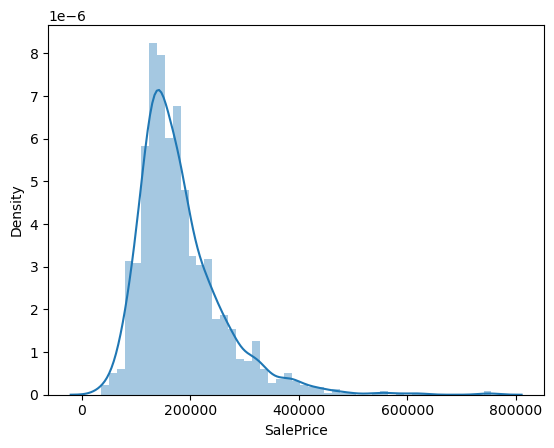

In [738]:
#Analysing the target variable
sns.distplot(house['SalePrice']);
plt.show()

Target variable is right skewed

In [739]:
## Check the skewness of target variable
house['SalePrice'].skew()

1.8828757597682129

skewness is greater than 1 so it is highly skewed so we will use log trasformation 

In [740]:
## Log transform the target variable
house['SalePrice'] = np.log(house['SalePrice'])

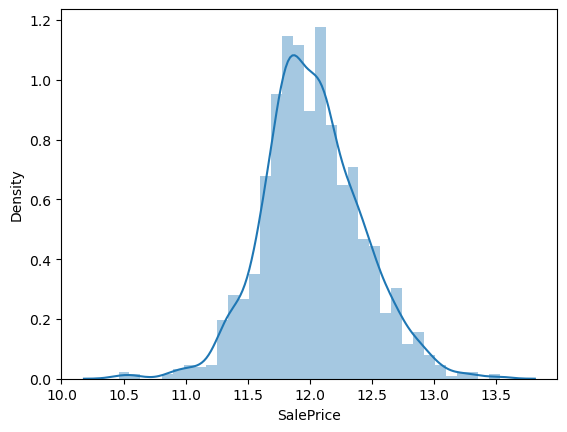

In [741]:
sns.distplot(house['SalePrice']);
plt.show()

In [742]:
#Diving the dataframe into numeric and categorical variables
## Extract numerical columns
house_num = house.select_dtypes(include=['int64', 'float64'])
## Extract categorical columns
house_cat = house.select_dtypes(include='object')


In [743]:
house_cat.dtypes

MSSubClass       object
MSZoning         object
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
OverallQual      object
OverallCond      object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageYrBlt      object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive      

In [744]:
house_num.head()

Id  LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0   1        65.00     8450       2003          2003      196.00         706   
1   2        80.00     9600       1976          1976        0.00         978   
2   3        68.00    11250       2001          2002      162.00         486   
3   4        60.00     9550       1915          1970        0.00         216   
4   5        84.00    14260       2000          2000      350.00         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0           0        150          856       856       854             0   
1           0        284         1262      1262         0             0   
2           0        434          920       920       866             0   
3           0        540          756       961       756             0   
4           0        490         1145      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  \
0             1             8           0           2         548           0   
1             1             6           1           2         460         298   
2             1             6           1           2         608           0   
3             1             7           1           3         642           0   
4             1             9           1           3         836         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0           61              0          0            0         0        0   
1            0              0          0            0         0        0   
2           42              0          0            0         0        0   
3           35            272          0            0         0        0   
4           84              0          0            0         0        0   

   MoSold  YrSold  SalePrice  
0       2    2008      12.25  
1       5    2007      12.11  
2       9    2008      12.32  
3       2    2006      11.85  
4      12    2008      12.43

### EDA on Numerical Columns


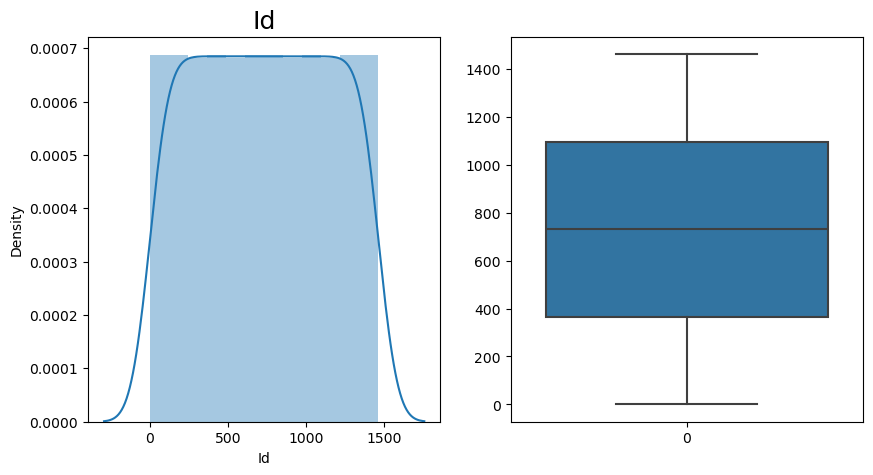

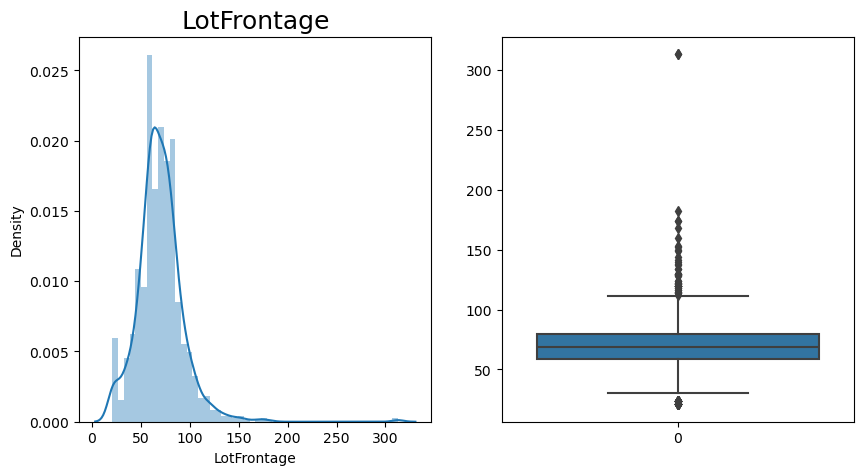

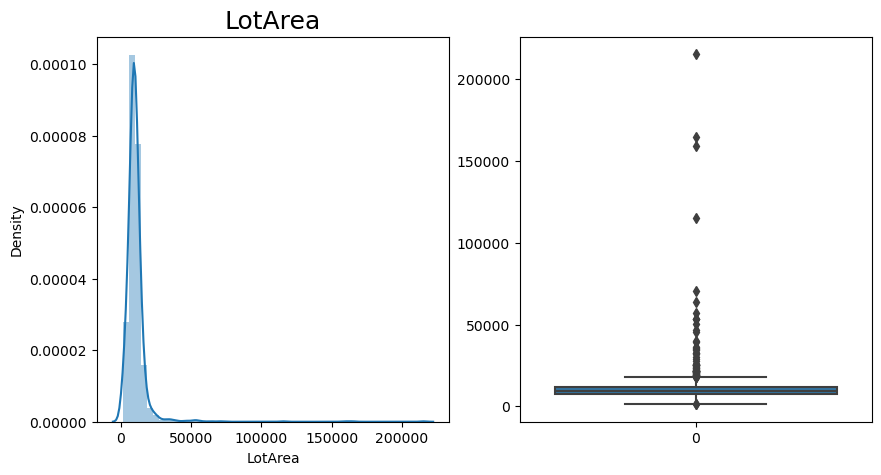

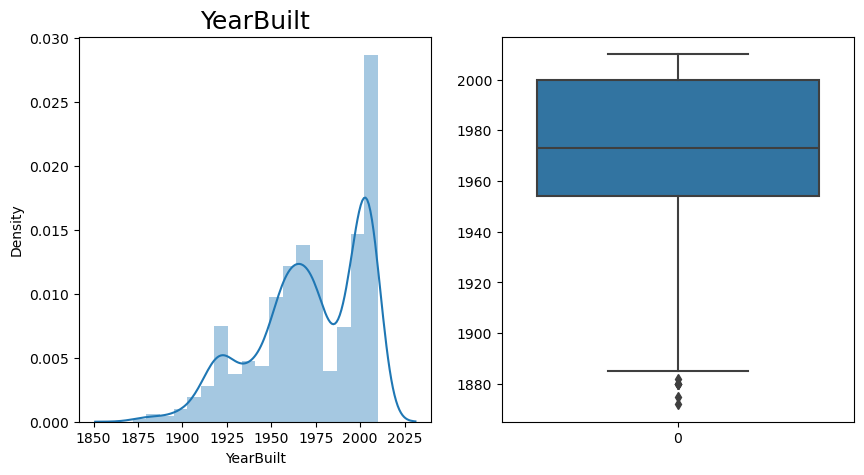

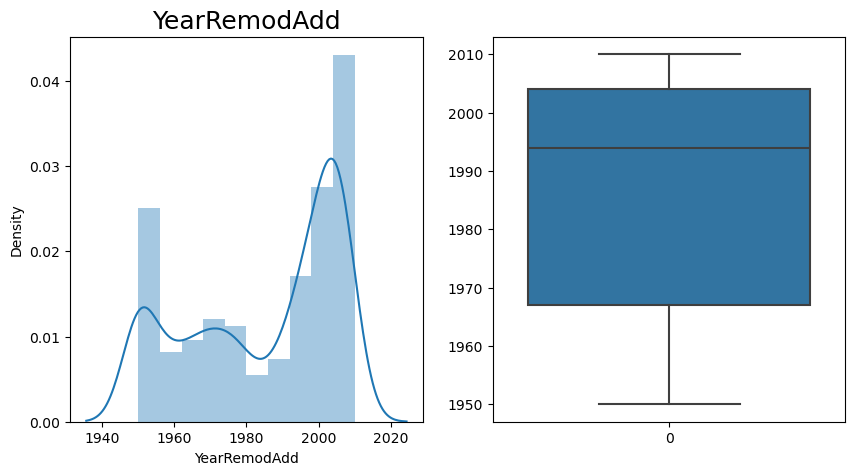

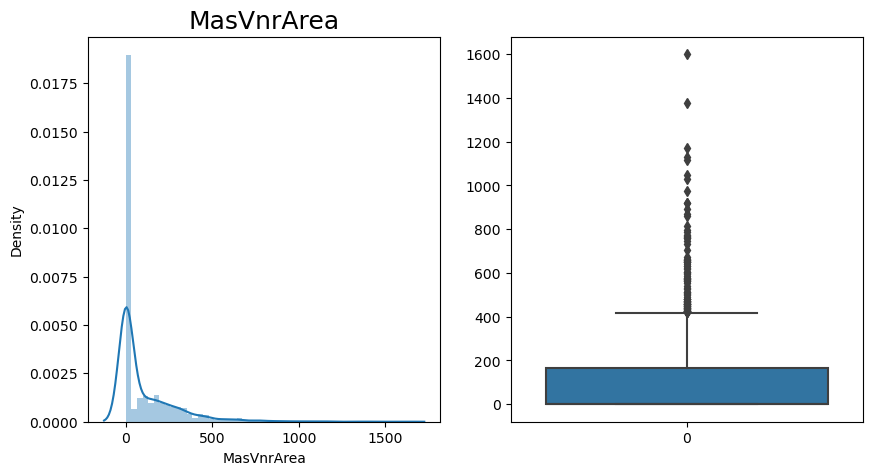

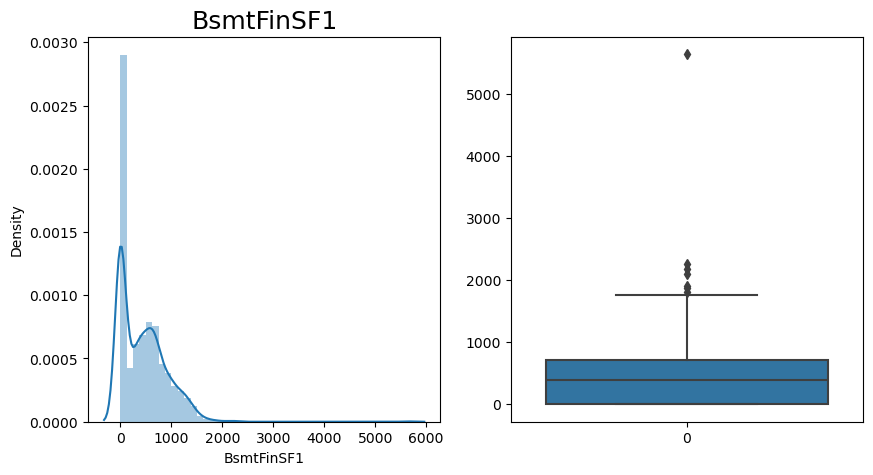

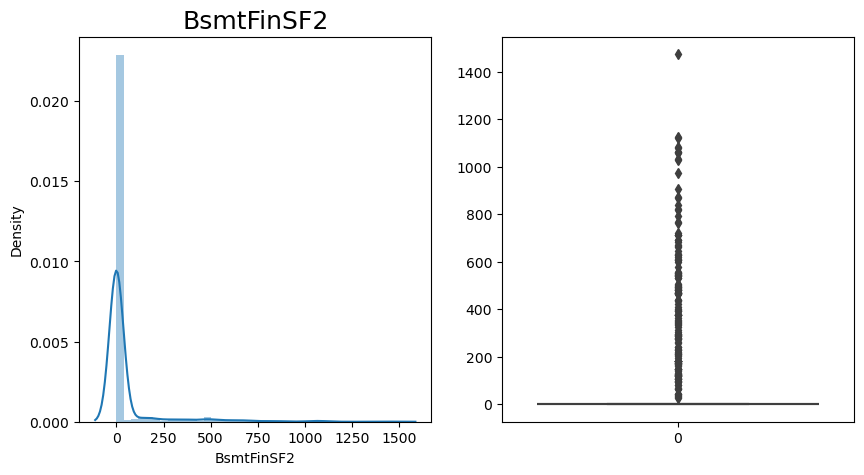

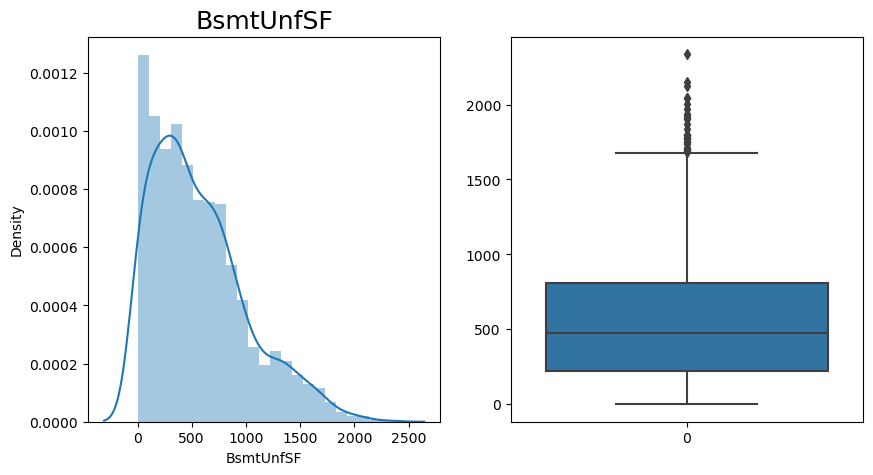

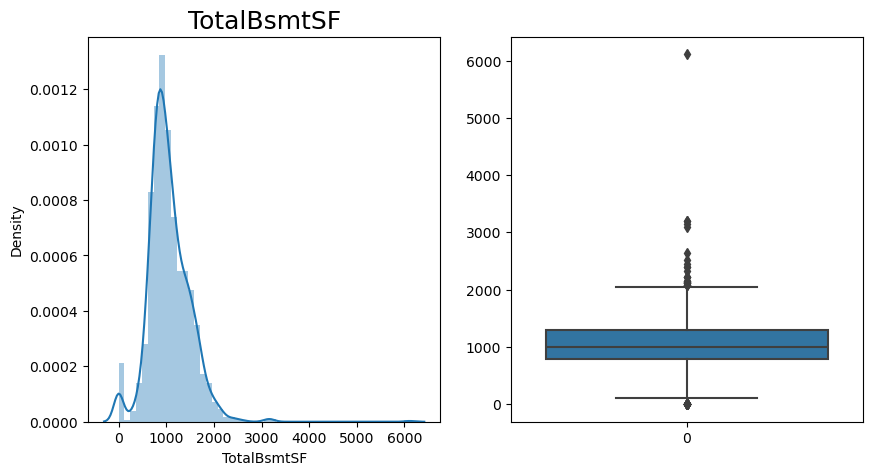

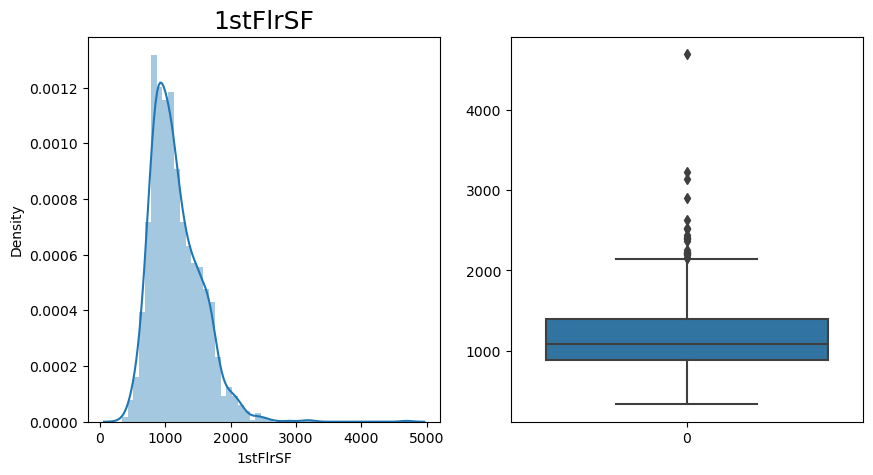

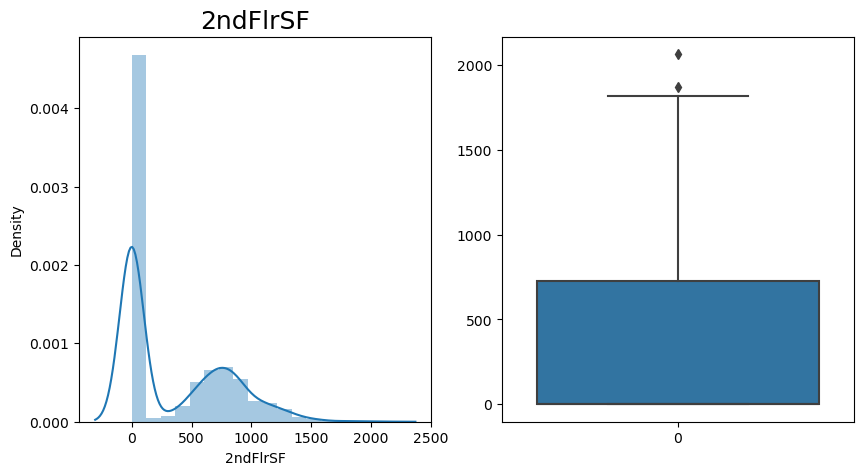

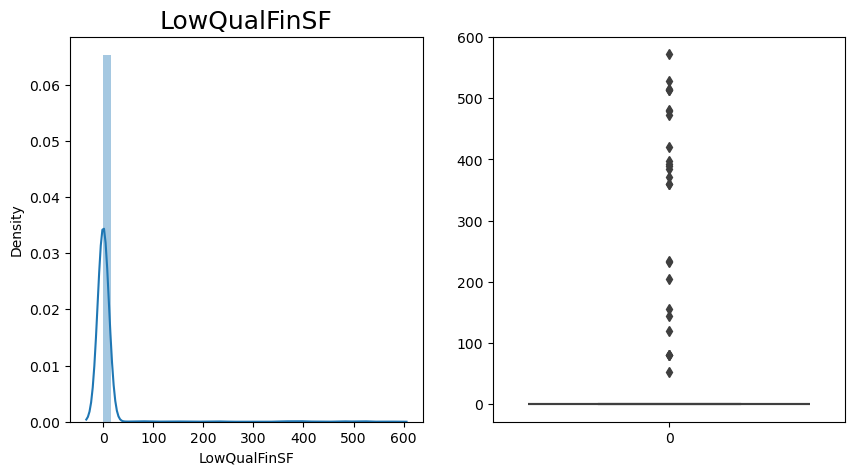

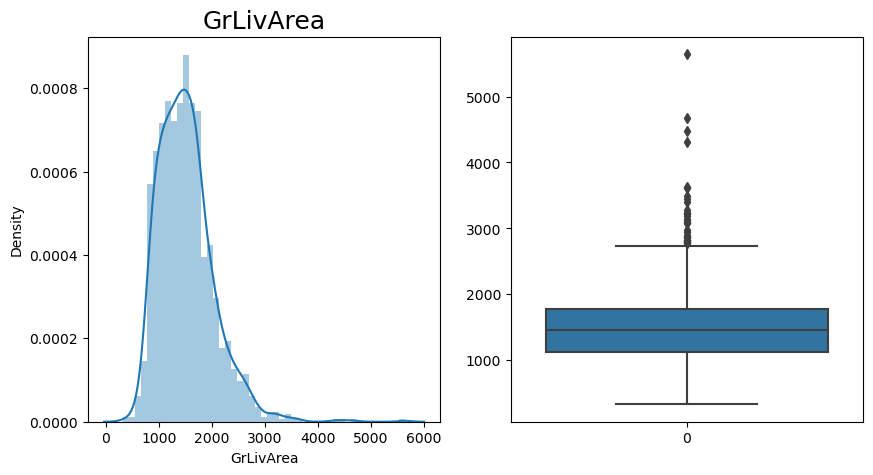

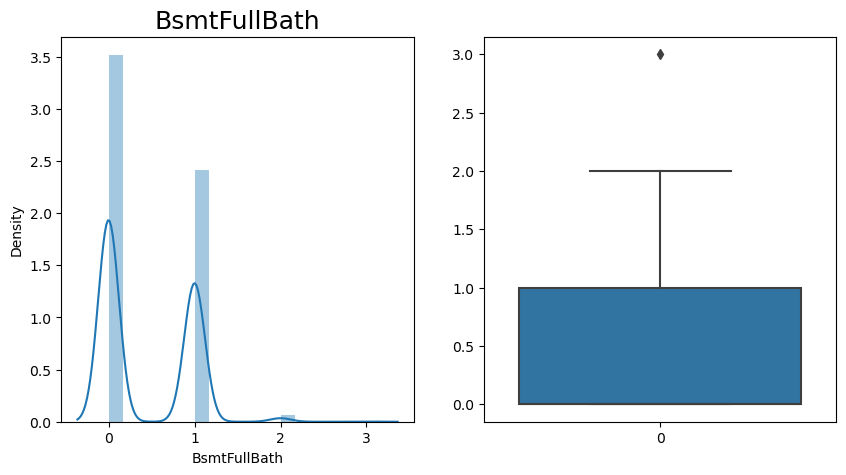

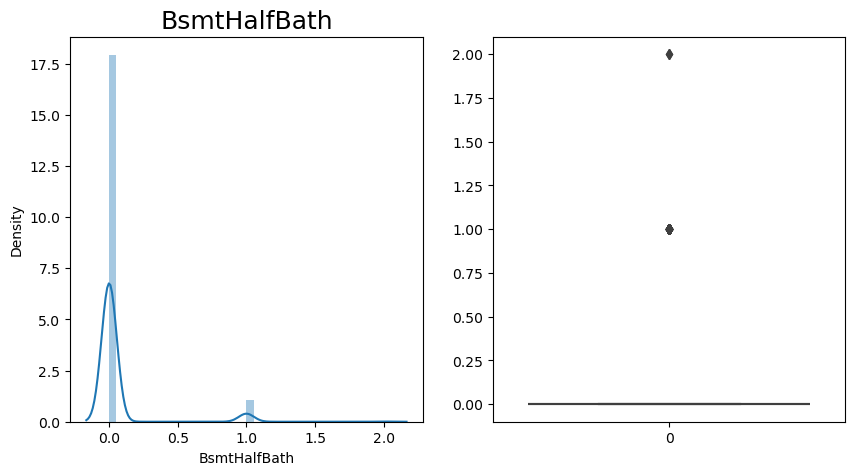

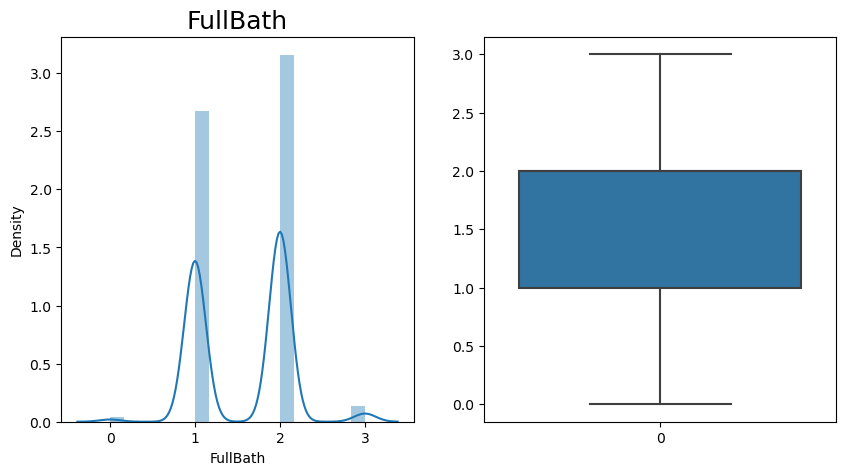

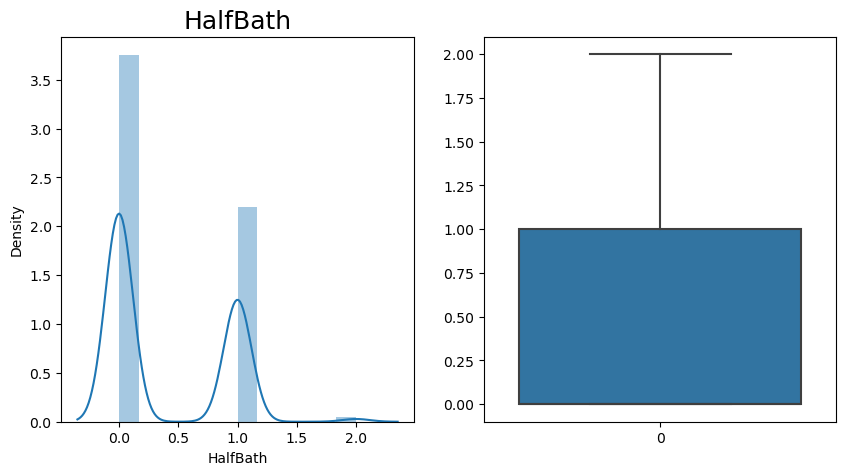

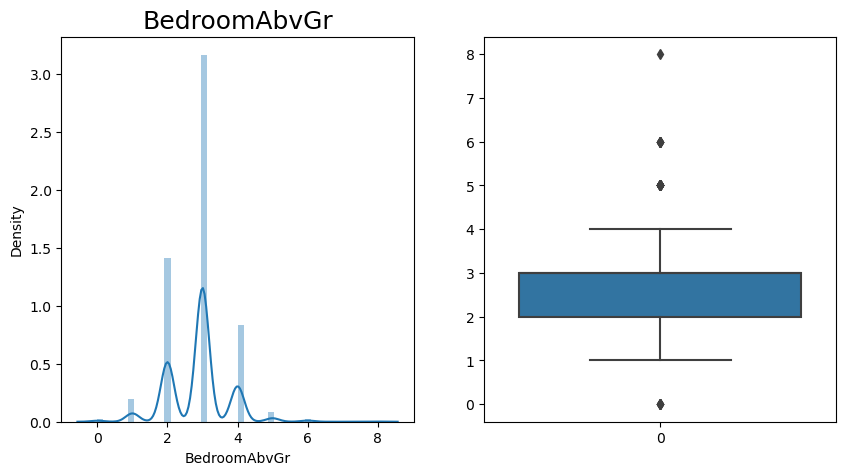

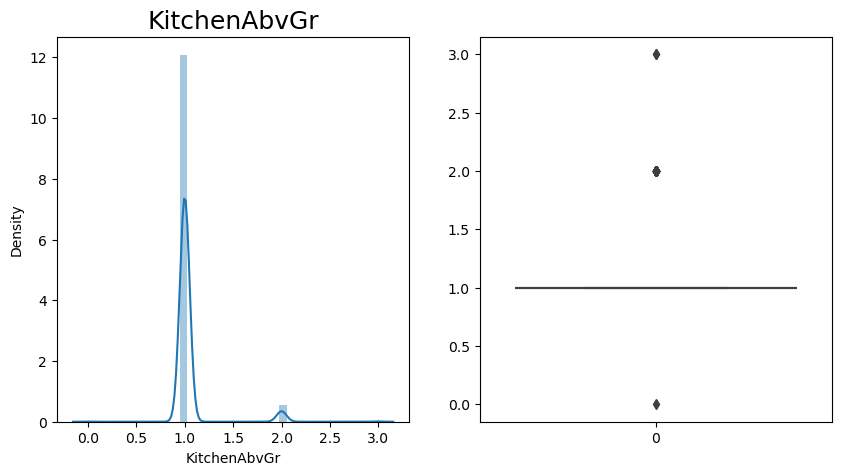

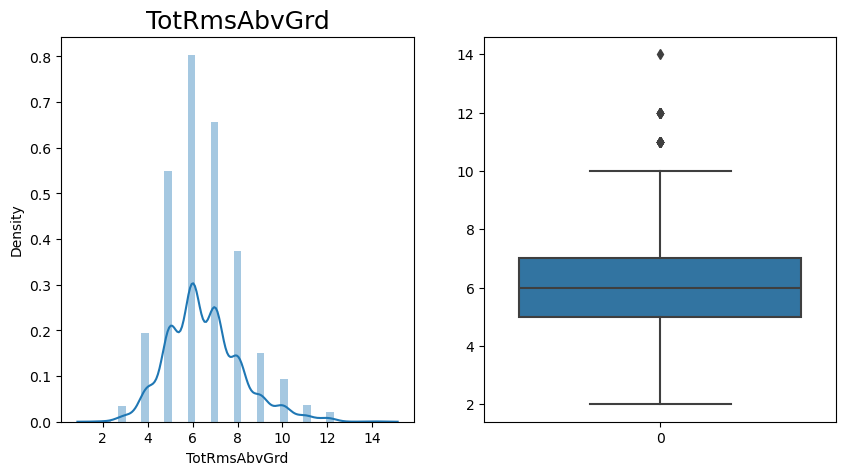

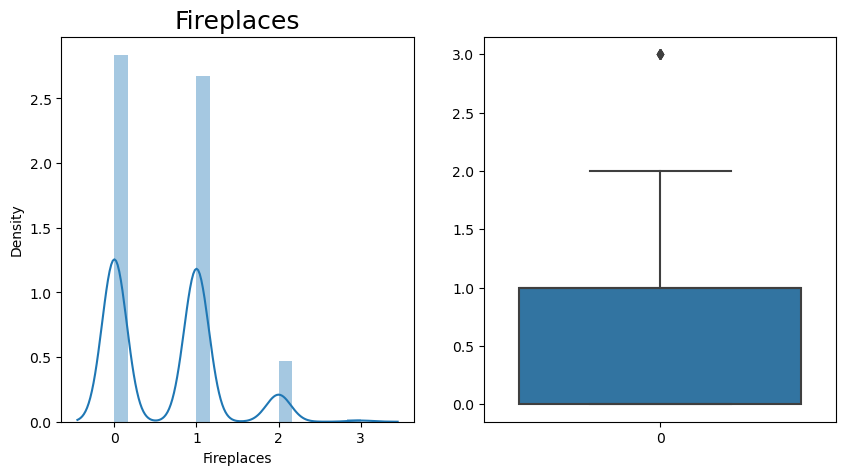

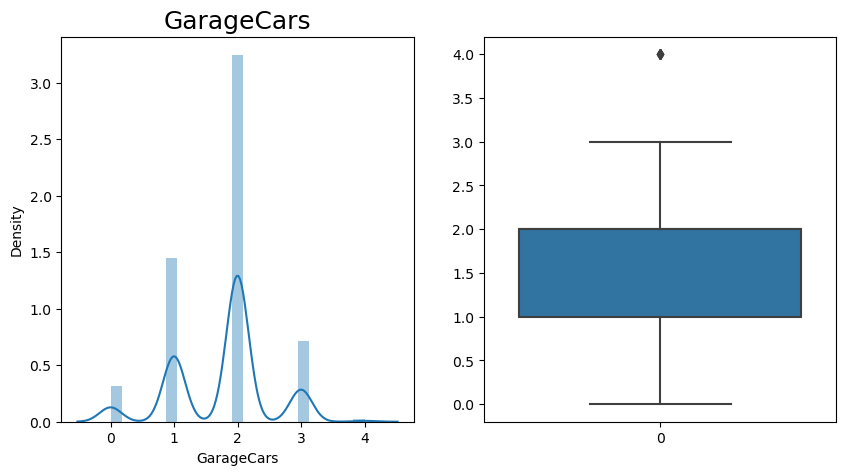

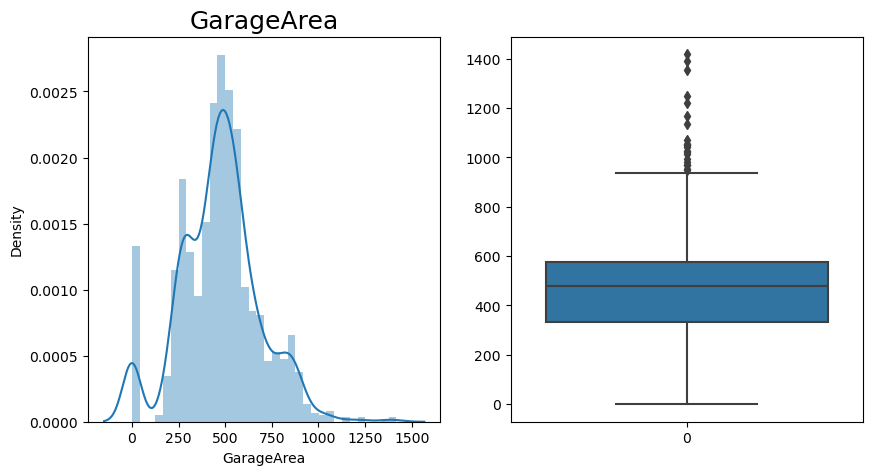

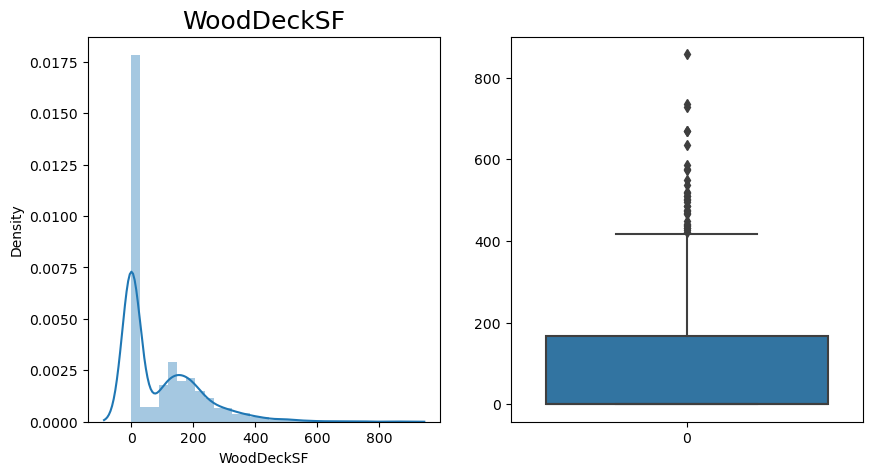

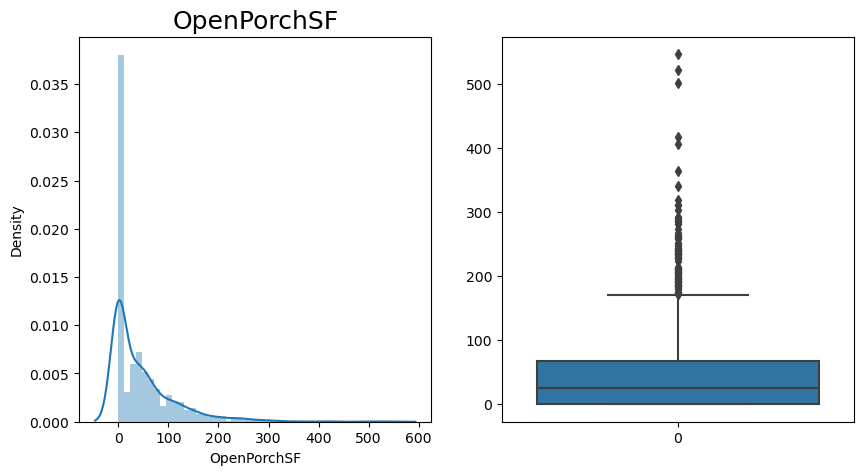

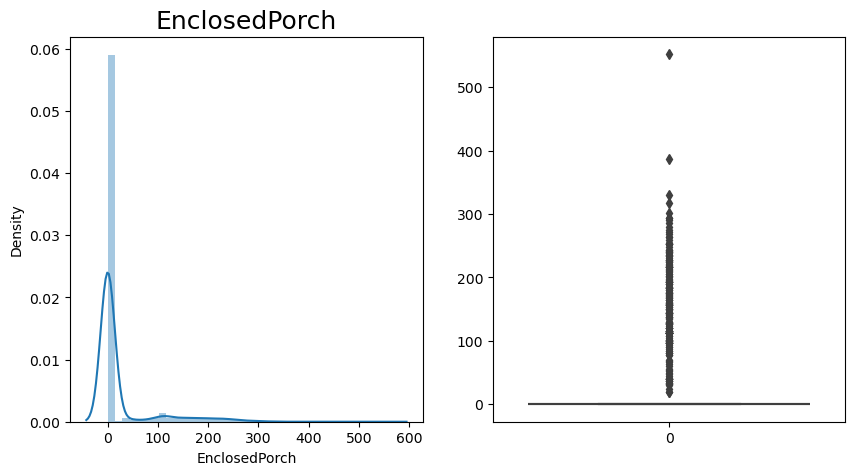

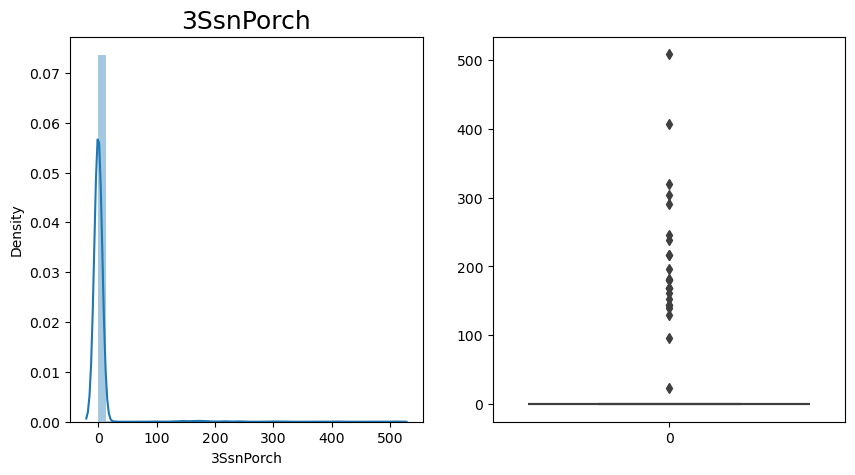

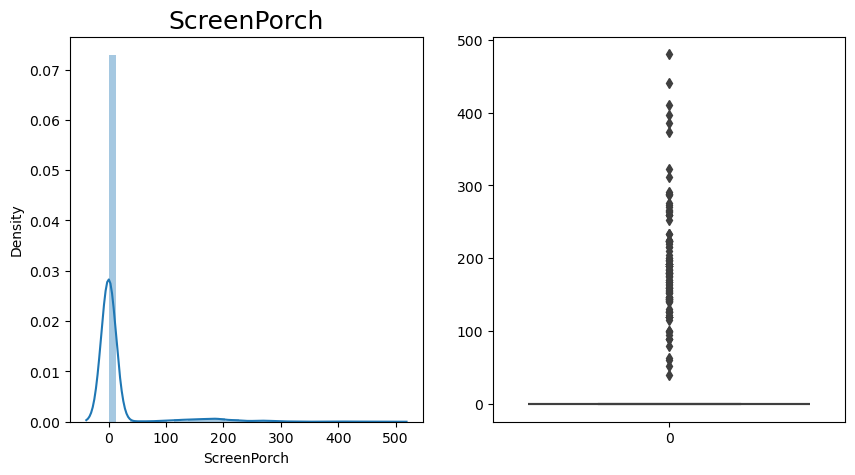

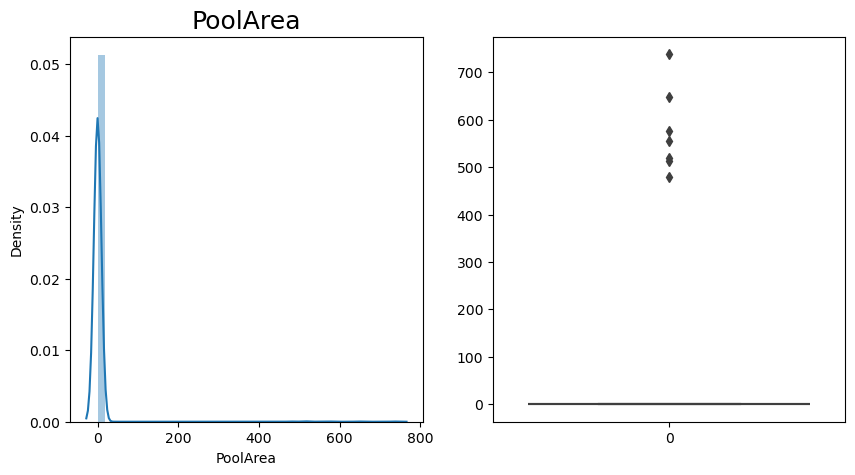

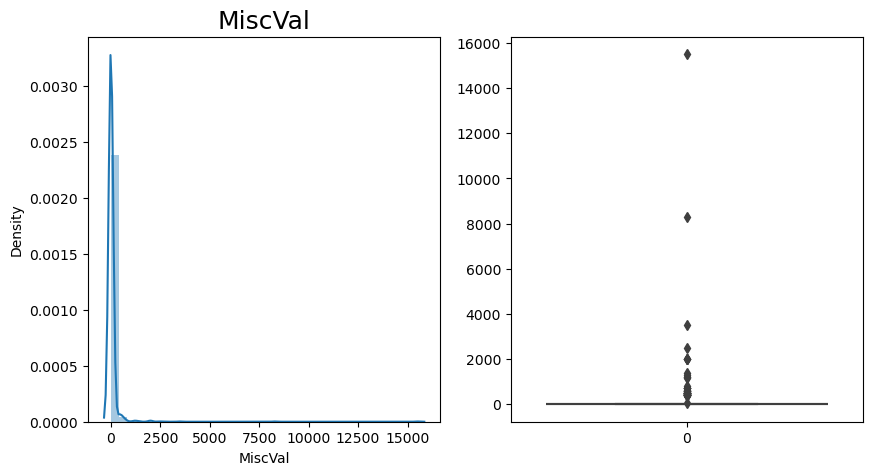

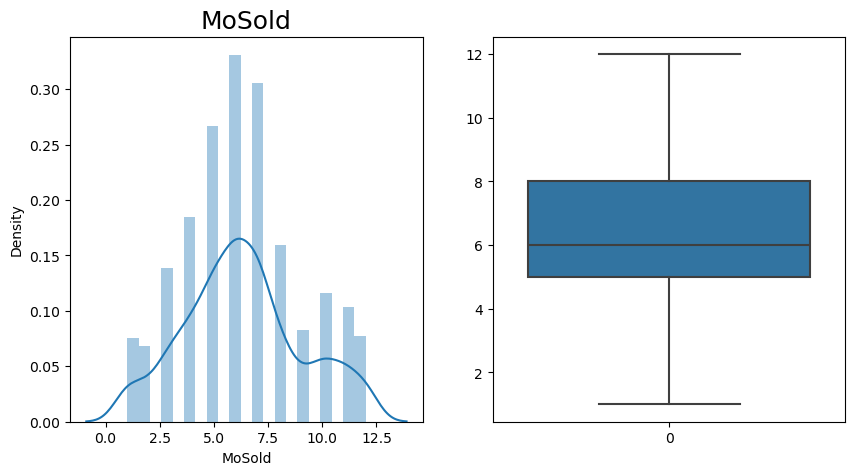

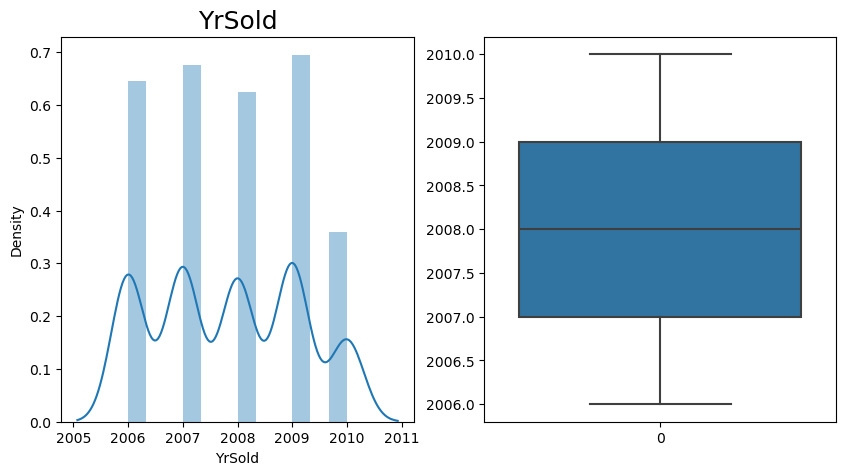

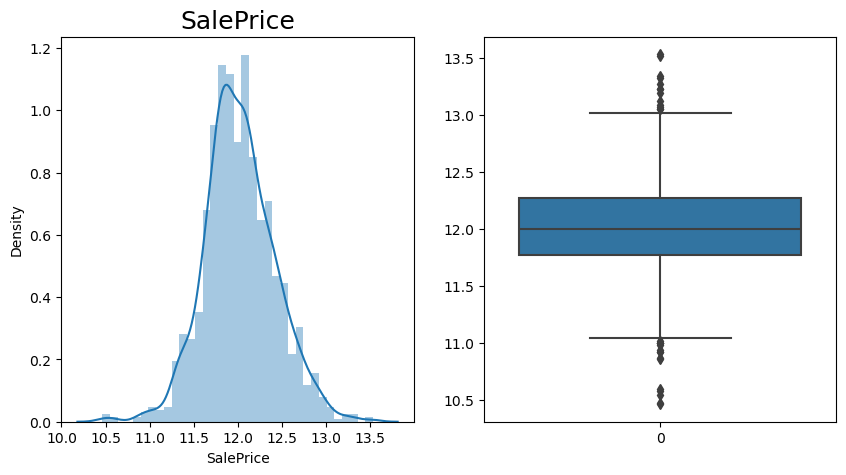

In [745]:
for col in house_num.columns:
    plt.figure(figsize=(10,5))
    
    plt.subplot(1,2,1)
    plt.title(col, fontdict={'fontsize': 18})
    sns.distplot(house_num[col])
    
    plt.subplot(1,2,2)
    sns.boxplot(house_num[col])
    plt.show()    

<br>Many of the numerical columns are having non-normal distribution.
<br>Most of the columns have outliers. So, we will require to do Outlier treatment.

### EDA on Categorical Columns

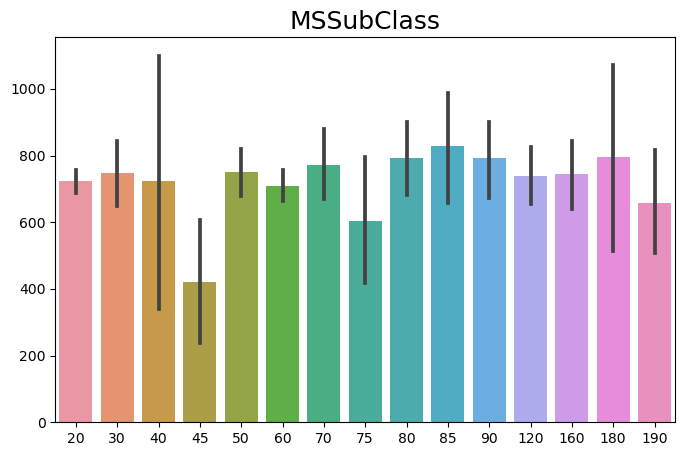

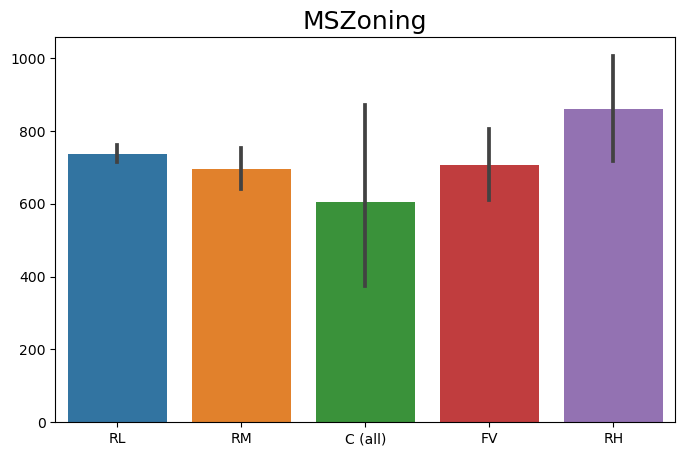

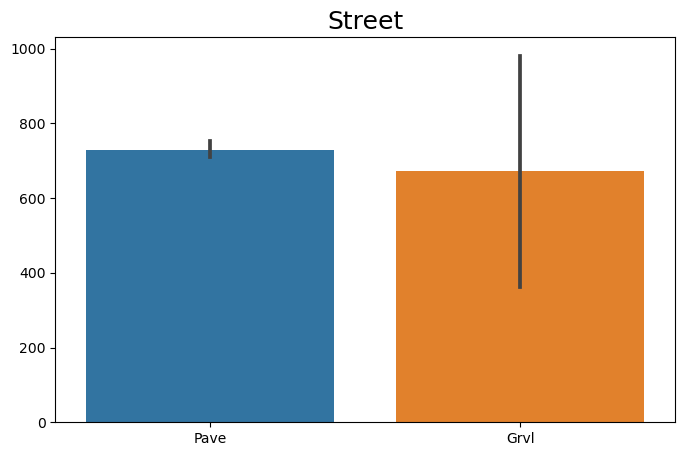

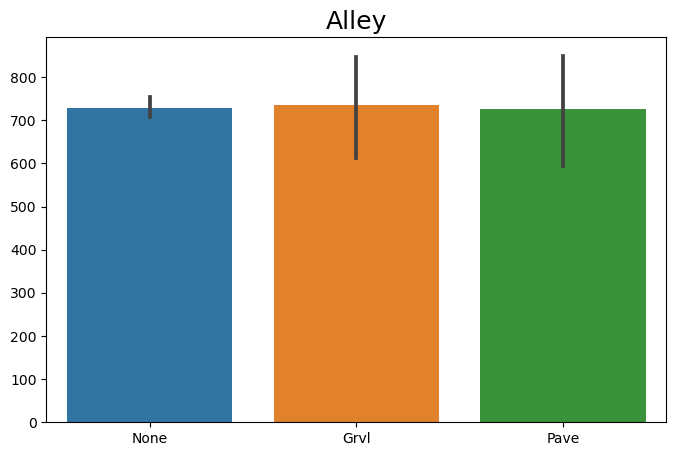

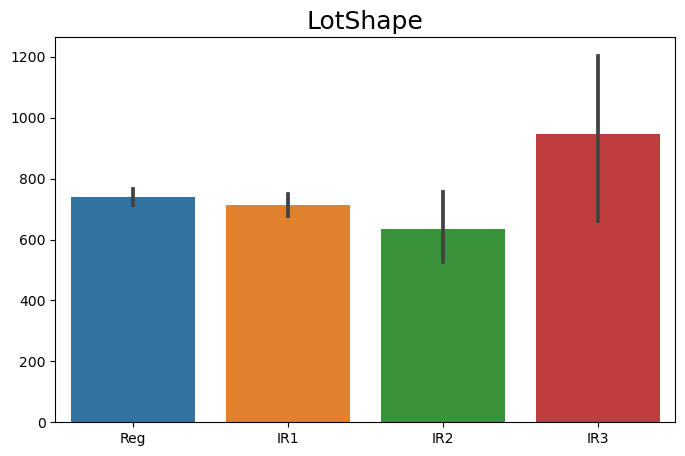

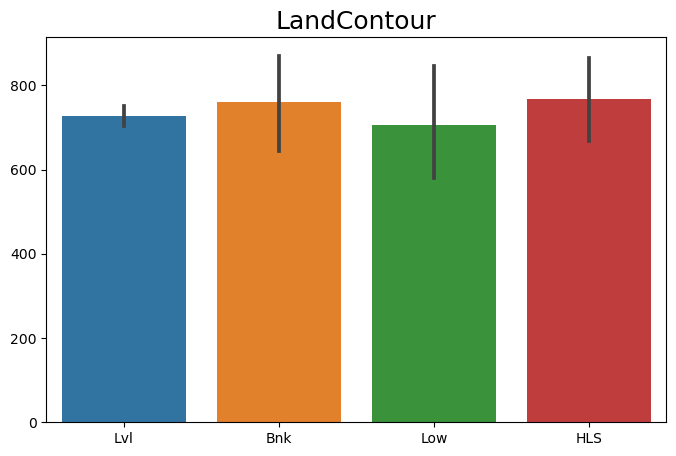

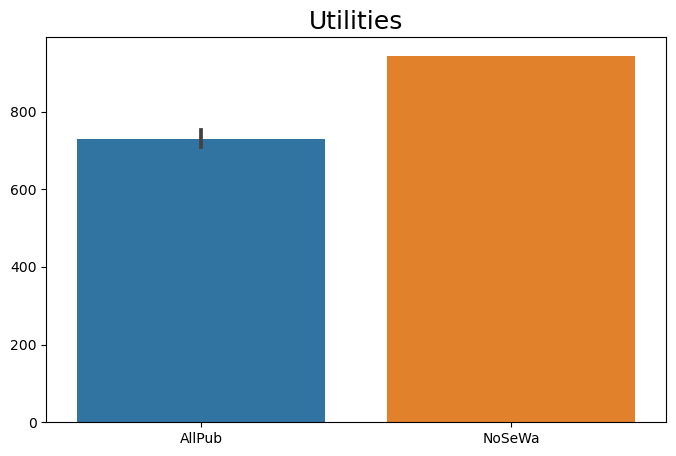

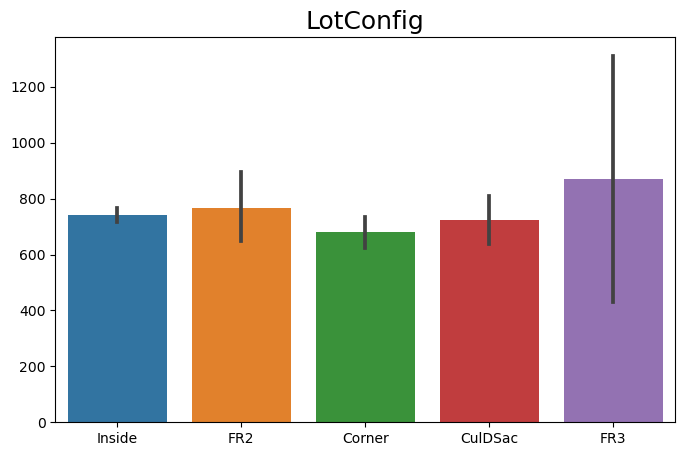

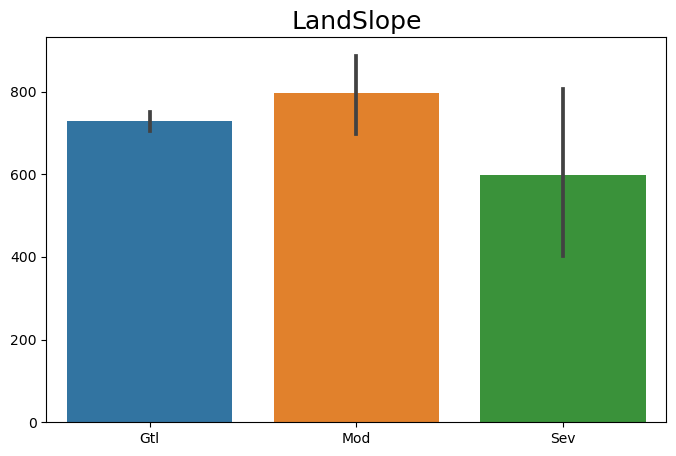

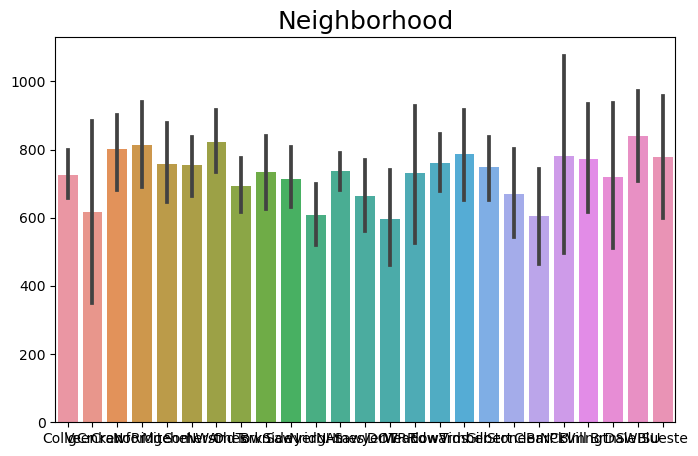

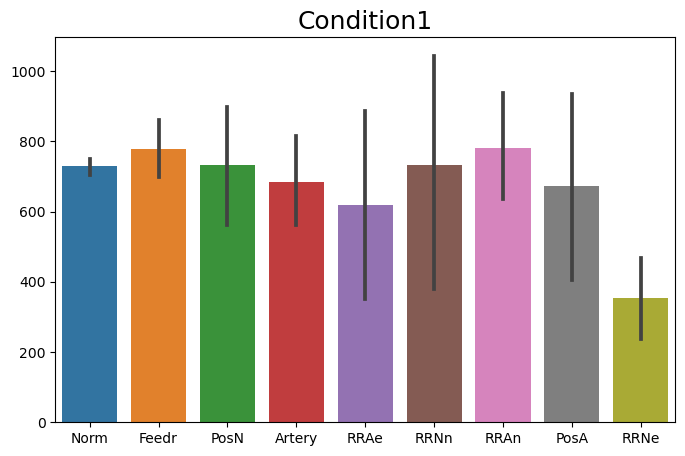

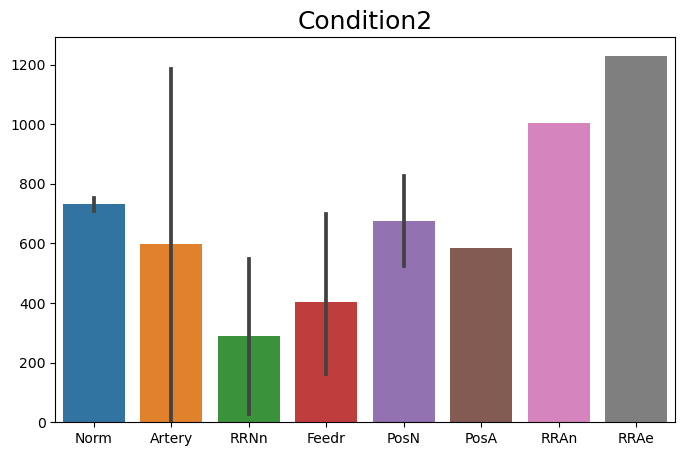

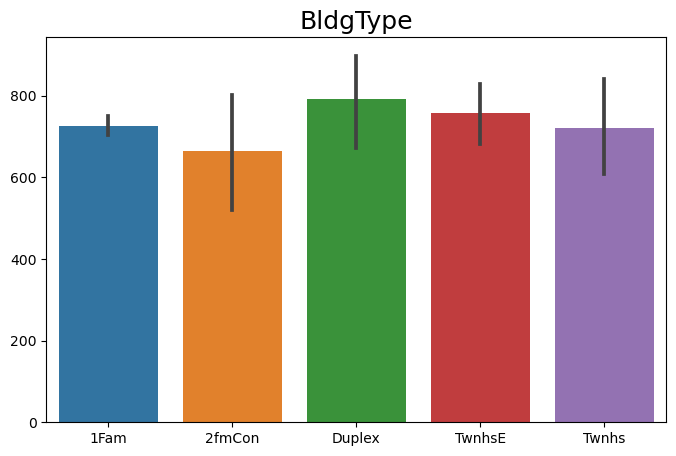

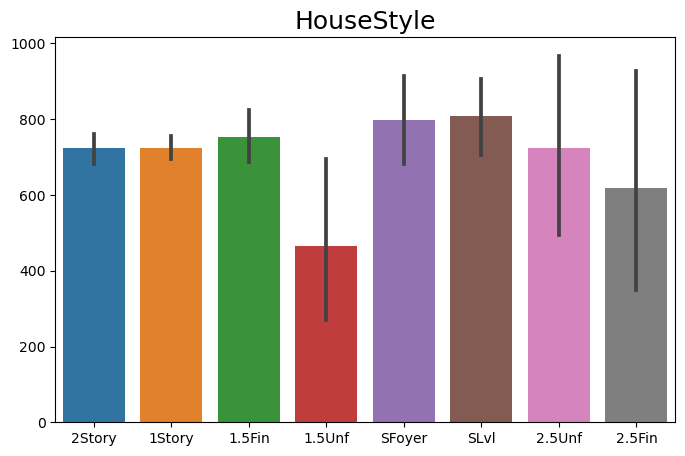

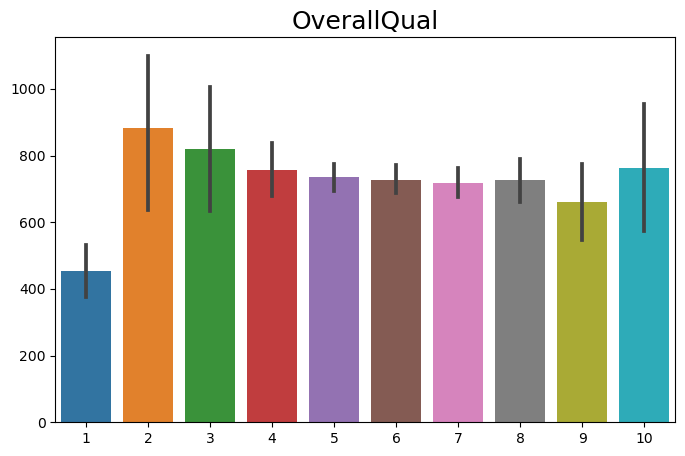

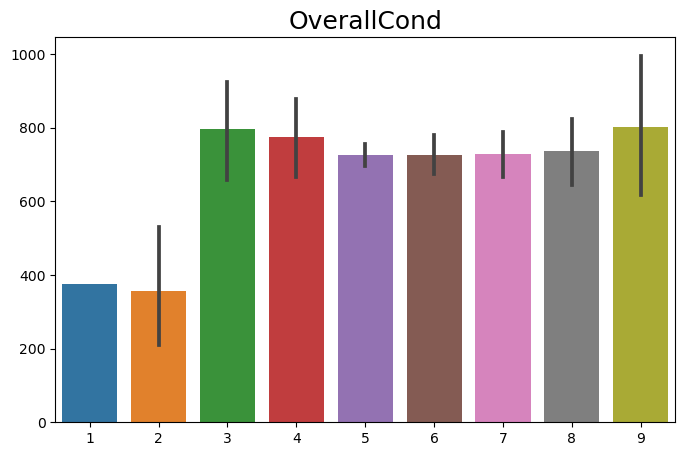

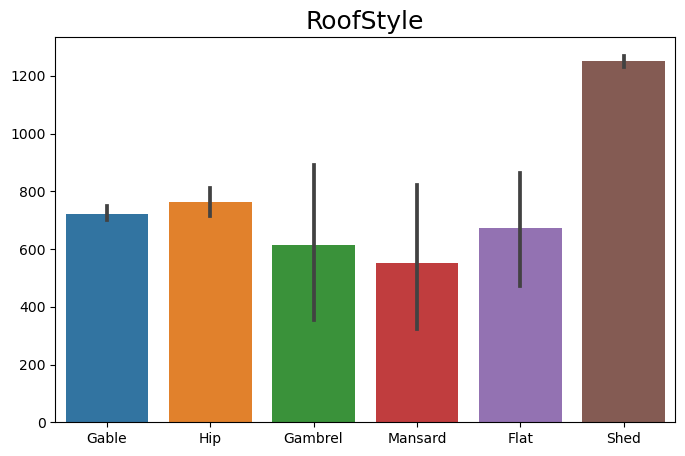

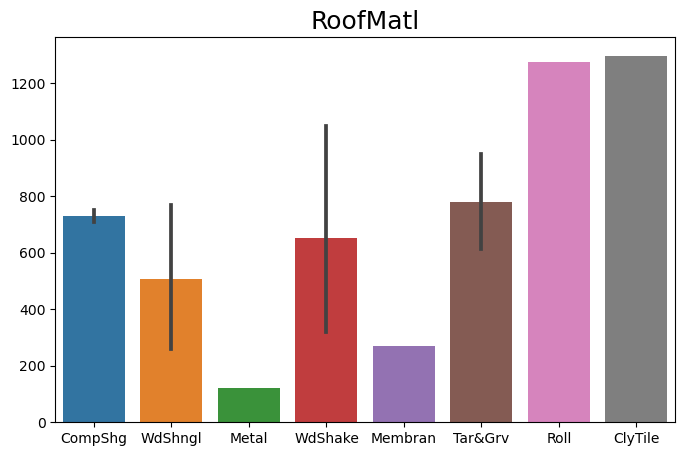

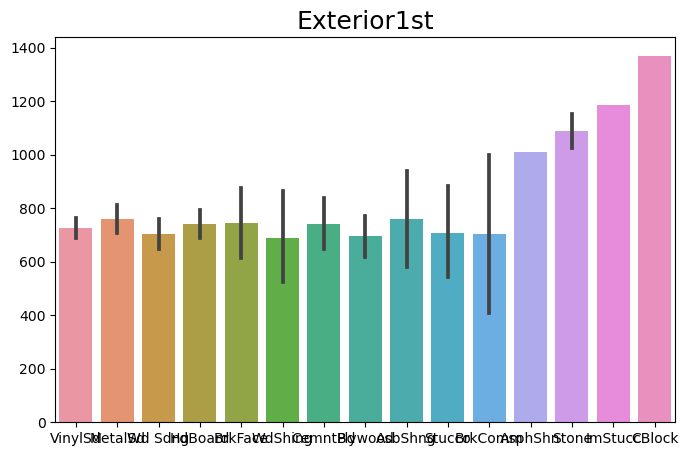

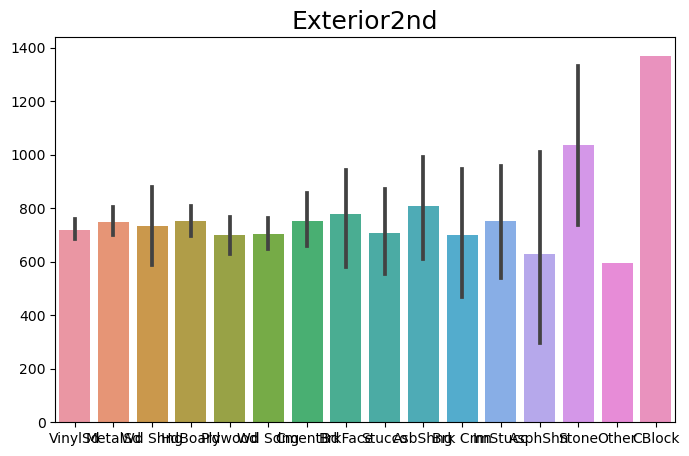

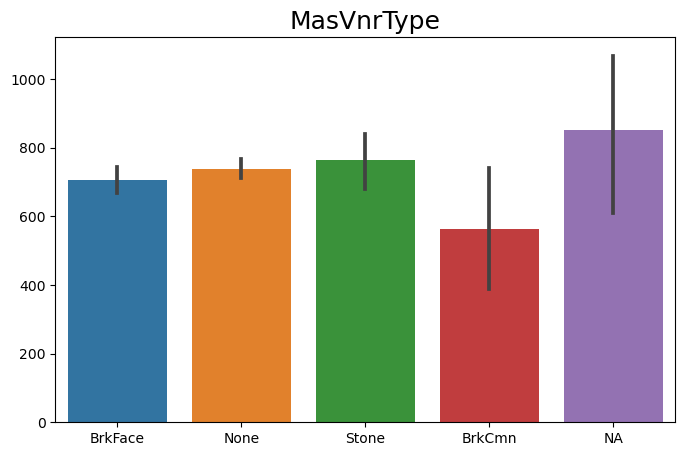

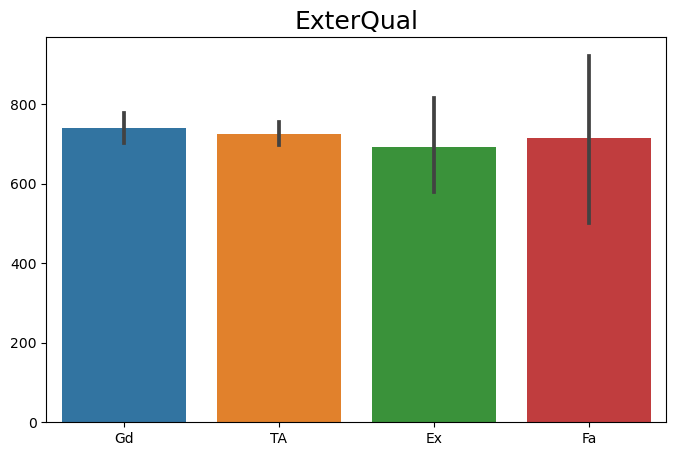

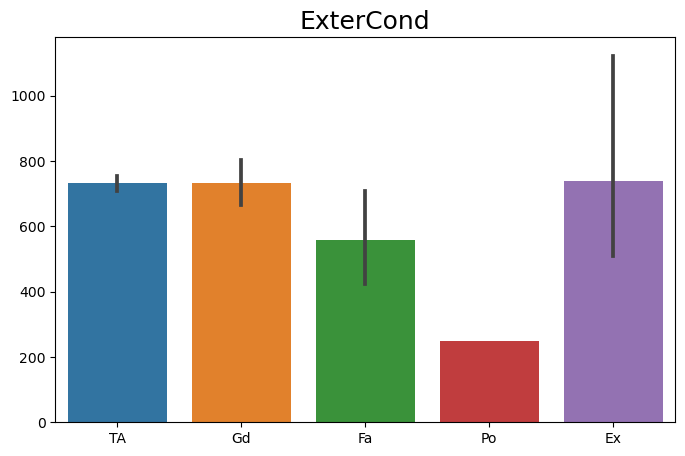

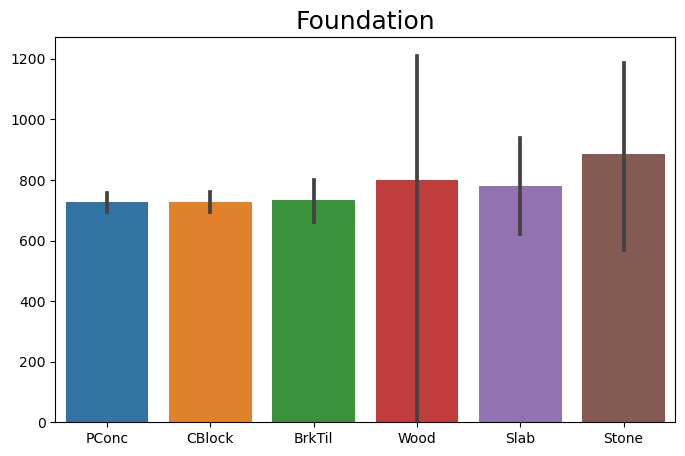

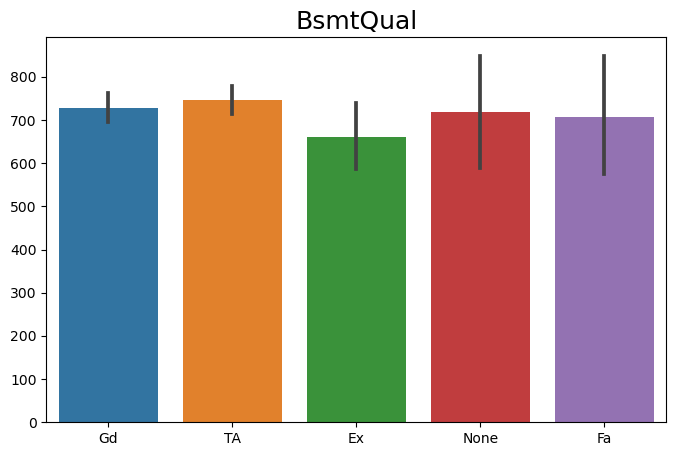

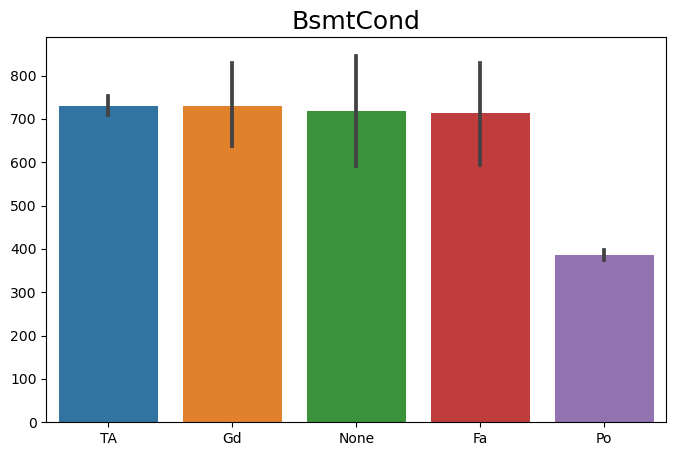

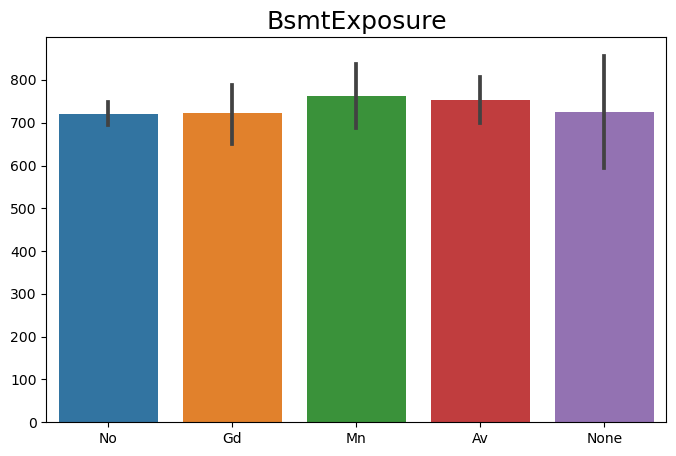

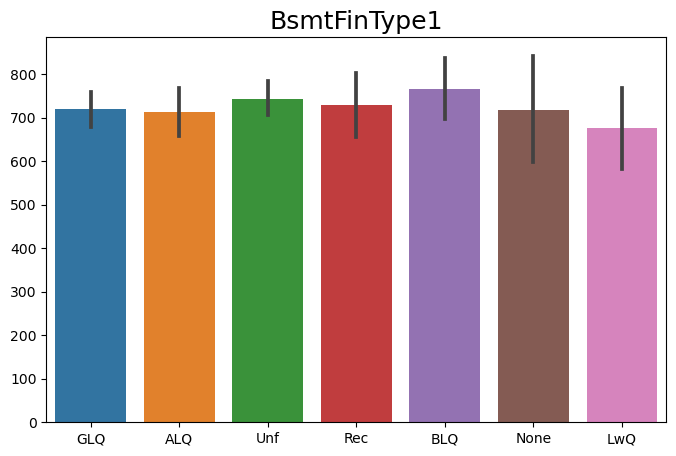

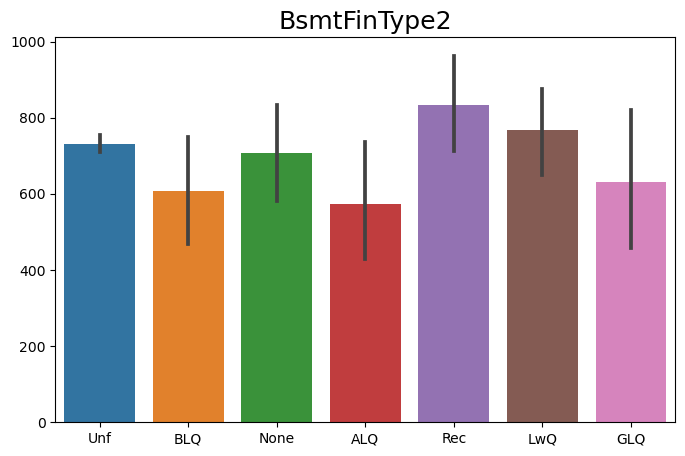

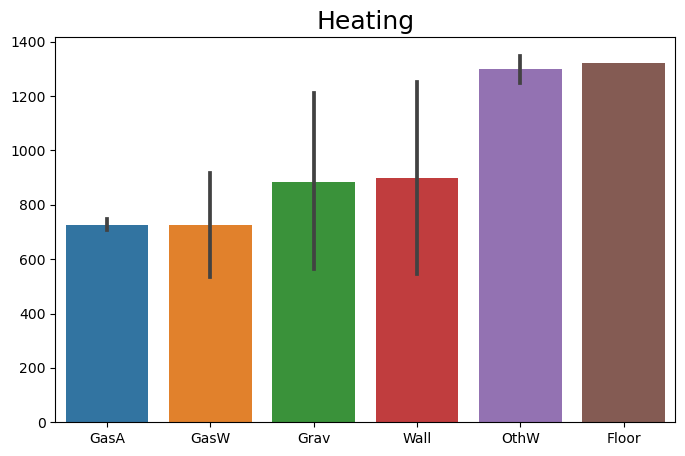

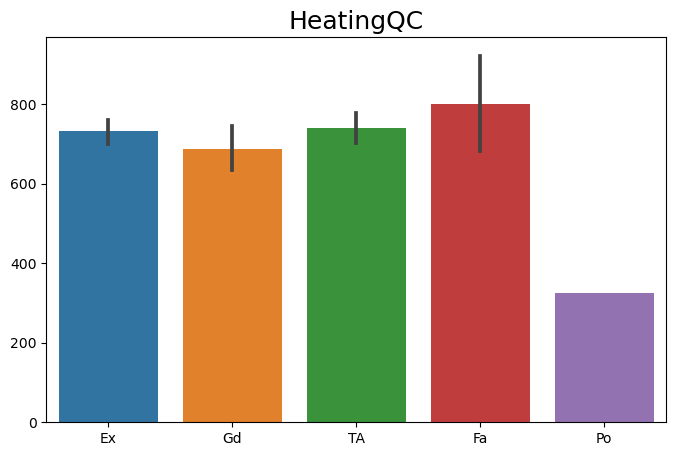

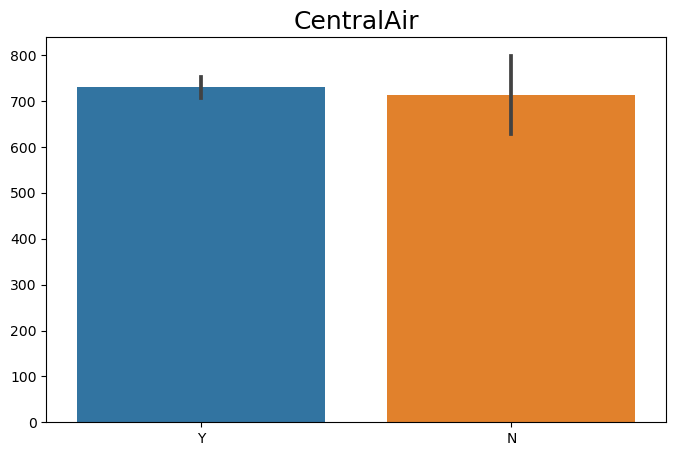

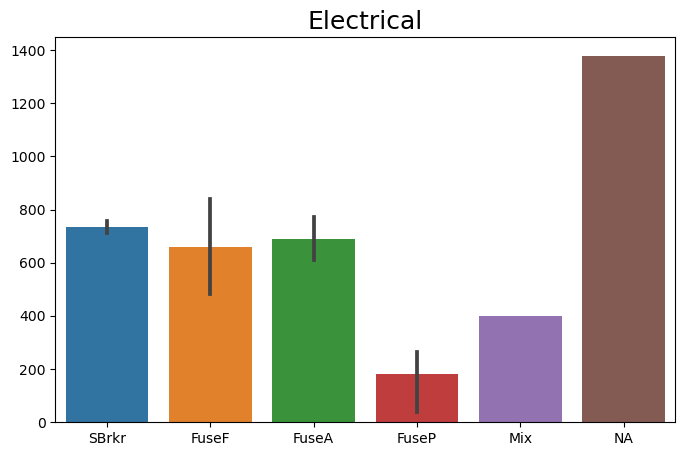

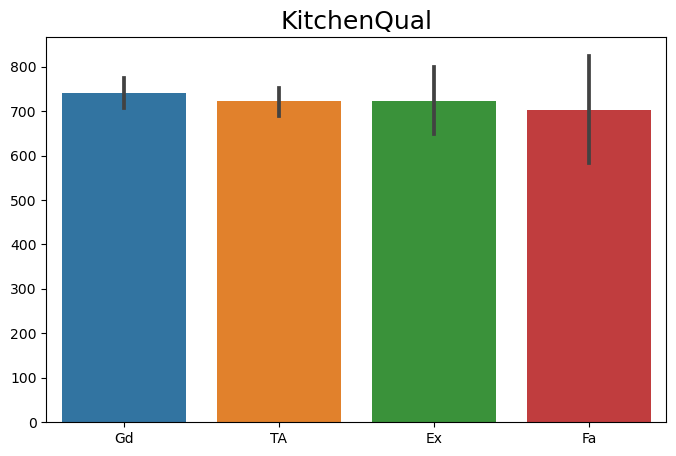

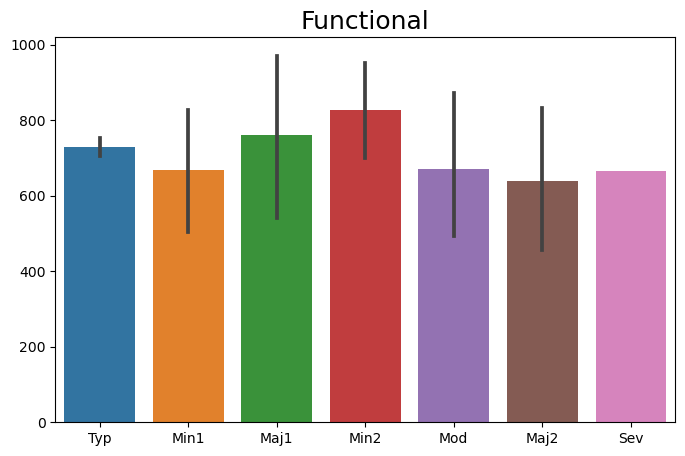

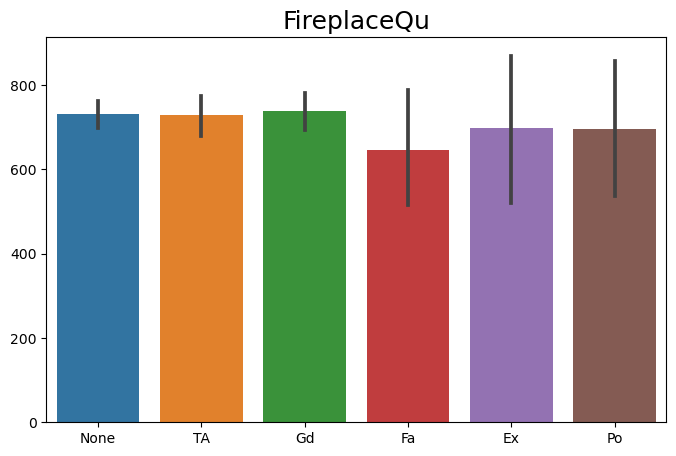

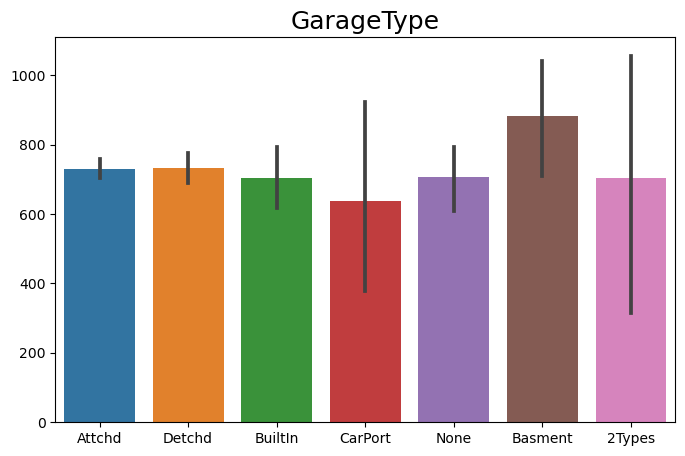

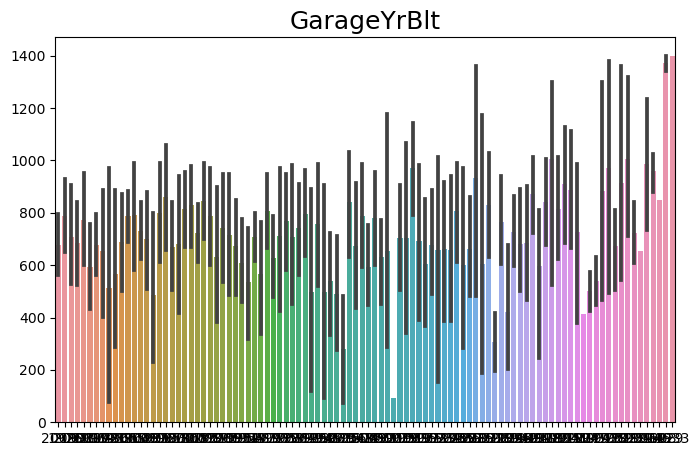

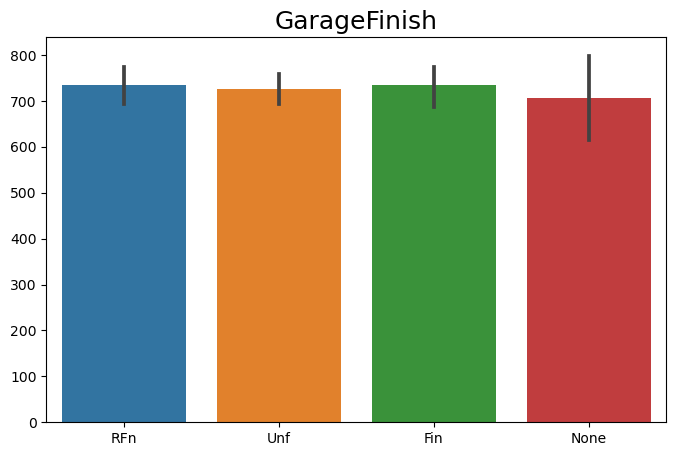

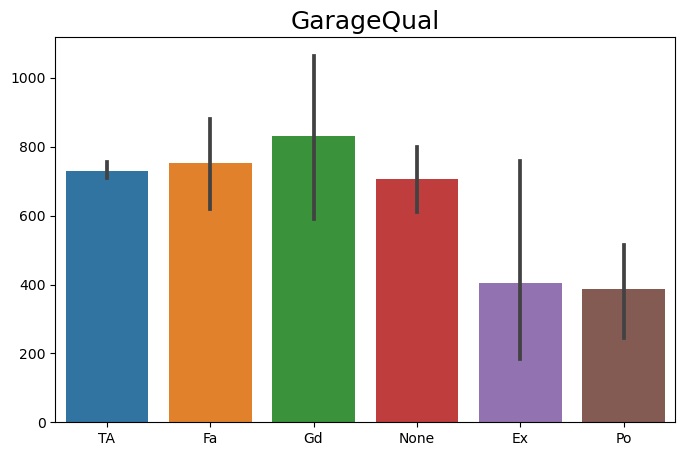

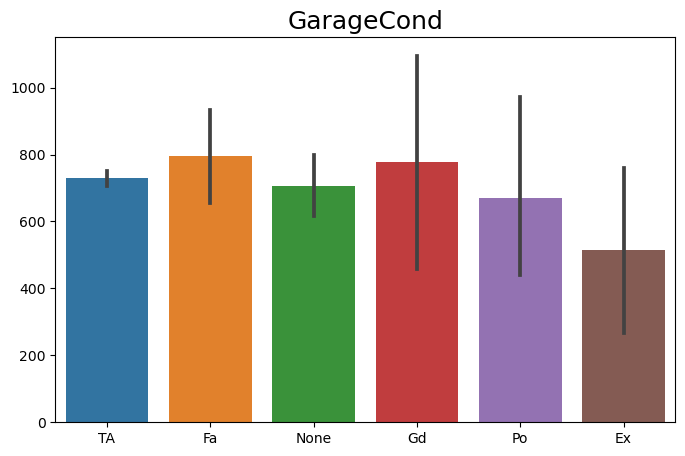

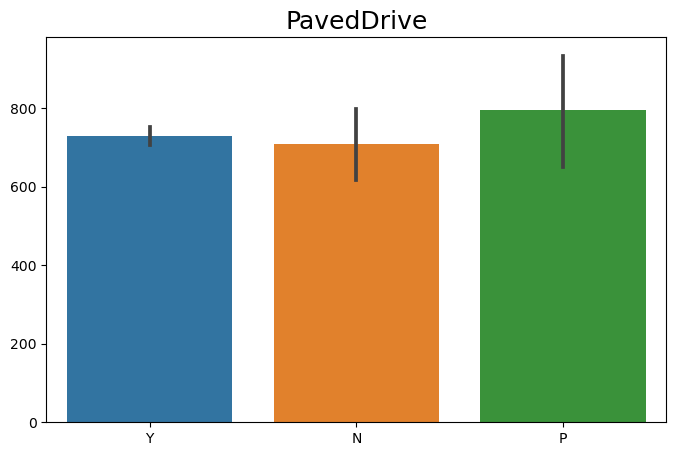

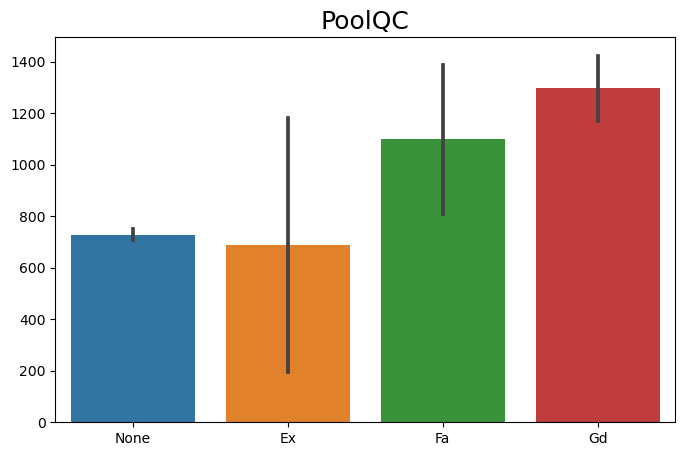

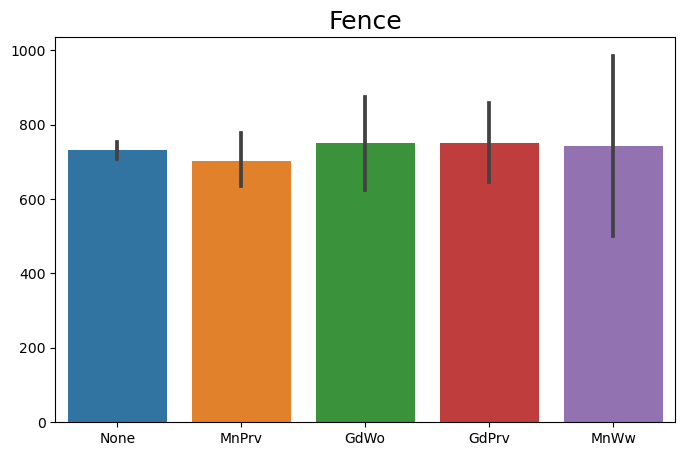

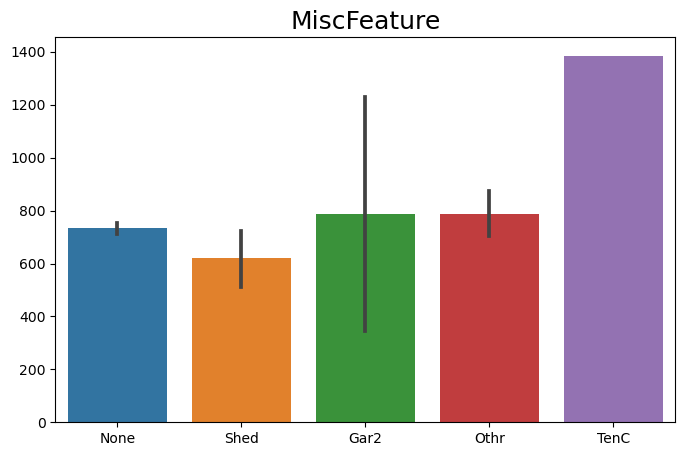

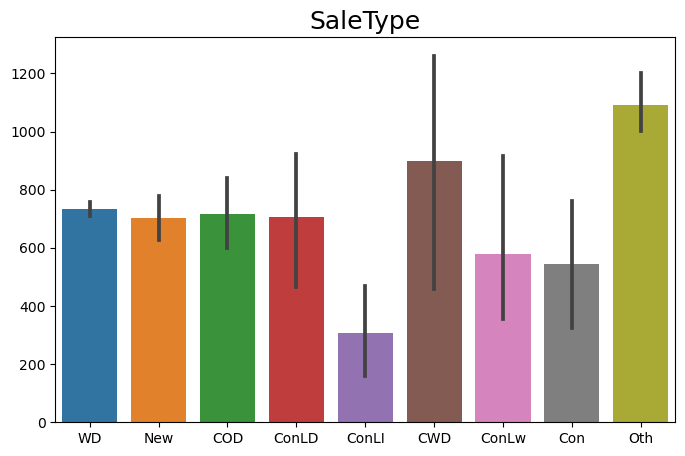

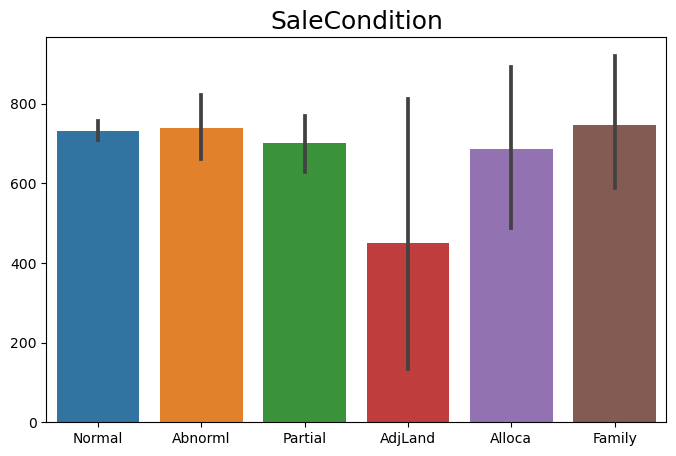

In [746]:
## Visualizing the levels of categorical columns using bar plots
for col in house_cat.columns:
    plt.figure(figsize=(8,5))
    plt.title(col, fontdict={'fontsize': 18})
    sns.barplot(x=house_cat[col].values, y=house_cat[col].index)
    
    plt.show()

So we observe from above value counts and bar plots that there is no column with single unique value that we could remove.

### Bivariate Analysis


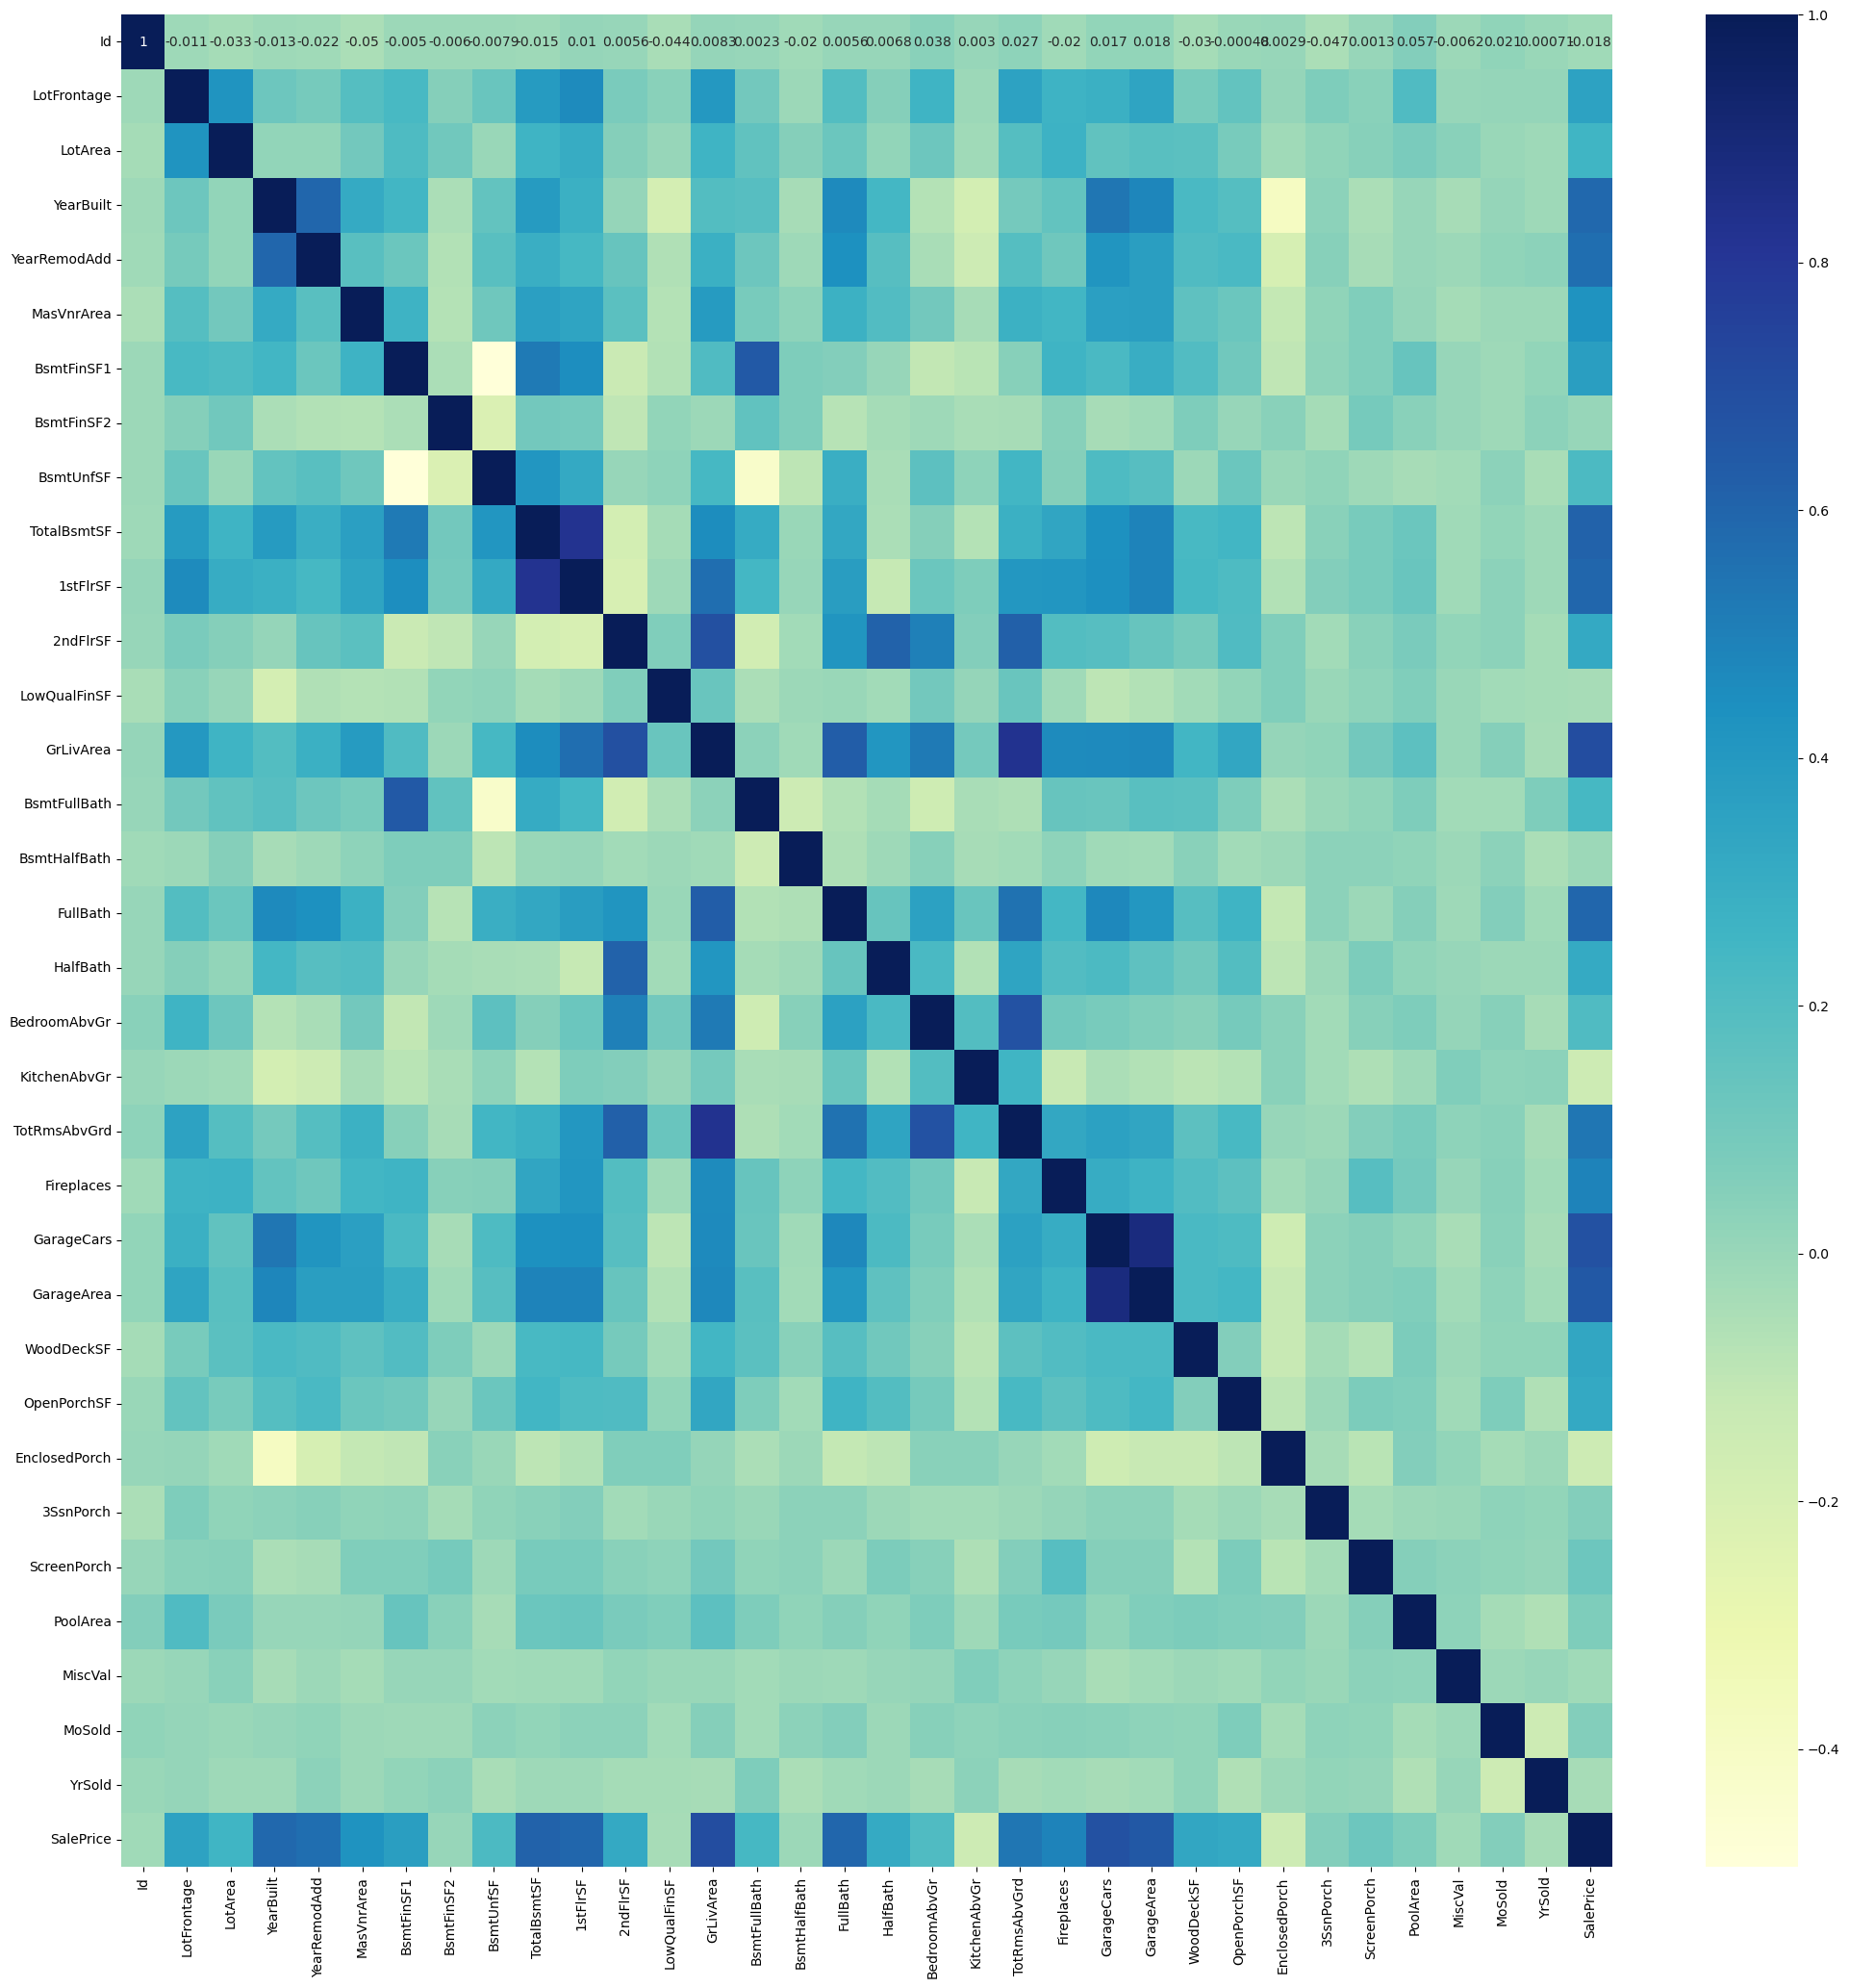

In [747]:
# Plot heatmap to detect correlations among numerical variables
plt.figure(figsize = (25, 25))
sns.heatmap(house_num.corr(), annot = True, cmap="YlGnBu")
plt.show()

Many columns are highly correlated with each other.
<br>target variable SalePrice is highly correlated with GrLivArea, GarageCars and GarageArea

## Step 3:Feature Engineering

In [748]:
## Create new column for the age of the house
house['Age'] = house['YrSold'] - house['YearBuilt']

In [749]:
## Drop the two columns from which we created new one
house.drop(['YrSold', 'YearBuilt'], axis=1, inplace=True)

In [750]:
house.head()

Id MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1         60       RL        65.00     8450   Pave  None      Reg   
1   2         20       RL        80.00     9600   Pave  None      Reg   
2   3         60       RL        68.00    11250   Pave  None      IR1   
3   4         70       RL        60.00     9550   Pave  None      IR1   
4   5         60       RL        84.00    14260   Pave  None      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle OverallQual OverallCond  YearRemodAdd  \
0       Norm     1Fam     2Story           7           5          2003   
1       Norm     1Fam     1Story           6           8          1976   
2       Norm     1Fam     2Story           7           5          2002   
3       Norm     1Fam     2Story           7           5          1970   
4       Norm     1Fam     2Story           8           5          2000   

  RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual  \
0     Gable  CompShg     VinylSd     VinylSd    BrkFace      196.00        Gd   
1     Gable  CompShg     MetalSd     MetalSd       None        0.00        TA   
2     Gable  CompShg     VinylSd     VinylSd    BrkFace      162.00        Gd   
3     Gable  CompShg     Wd Sdng     Wd Shng       None        0.00        TA   
4     Gable  CompShg     VinylSd     VinylSd    BrkFace      350.00        Gd   

  ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
0        TA      PConc       Gd       TA           No          GLQ   
1        TA     CBlock       Gd       TA           Gd          ALQ   
2        TA      PConc       Gd       TA           Mn          GLQ   
3        TA     BrkTil       TA       Gd           No          ALQ   
4        TA      PConc       Gd       TA           Av          GLQ   

   BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating  \
0         706          Unf           0        150          856    GasA   
1         978          Unf           0        284         1262    GasA   
2         486          Unf           0        434          920    GasA   
3         216          Unf           0        540          756    GasA   
4         655          Unf           0        490         1145    GasA   

  HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0        Ex          Y      SBrkr       856       854             0   
1        Ex          Y      SBrkr      1262         0             0   
2        Ex          Y      SBrkr       920       866             0   
3        Gd          Y      SBrkr       961       756             0   
4        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0        None   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd             7        Typ           1          Gd   
4             1          Gd             9  

### Step 4: Data Preprocessing 

Missing Value Treatment


In [751]:
house.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley              0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath 

In [752]:
## Replacing missing values in the above mentioned two columns by their means
house['LotFrontage'].fillna(house['LotFrontage'].mean(), inplace=True)
house['MasVnrArea'].fillna(house['MasVnrArea'].mean(), inplace=True)


In [753]:
house.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

In [754]:
from sklearn.preprocessing import LabelEncoder

In [755]:
#perform label encoding across team, position, and all_star columns
house_cat = house_cat.apply(LabelEncoder().fit_transform)

In [756]:
house[feature].head()

0     Normal
1     Normal
2     Normal
3    Abnorml
4     Normal
Name: SaleCondition, dtype: object

In [757]:
house.shape

(1460, 80)

In [758]:
## Capping outliers to 5% at lower bound and 95% at upper bound
for col in house_num.columns:
    house_num[col][house_num[col] <= house_num[col].quantile(0.05)] = house_num[col].quantile(0.05)
    house_num[col][house_num[col] >= house_num[col].quantile(0.95)] = house_num[col].quantile(0.95)

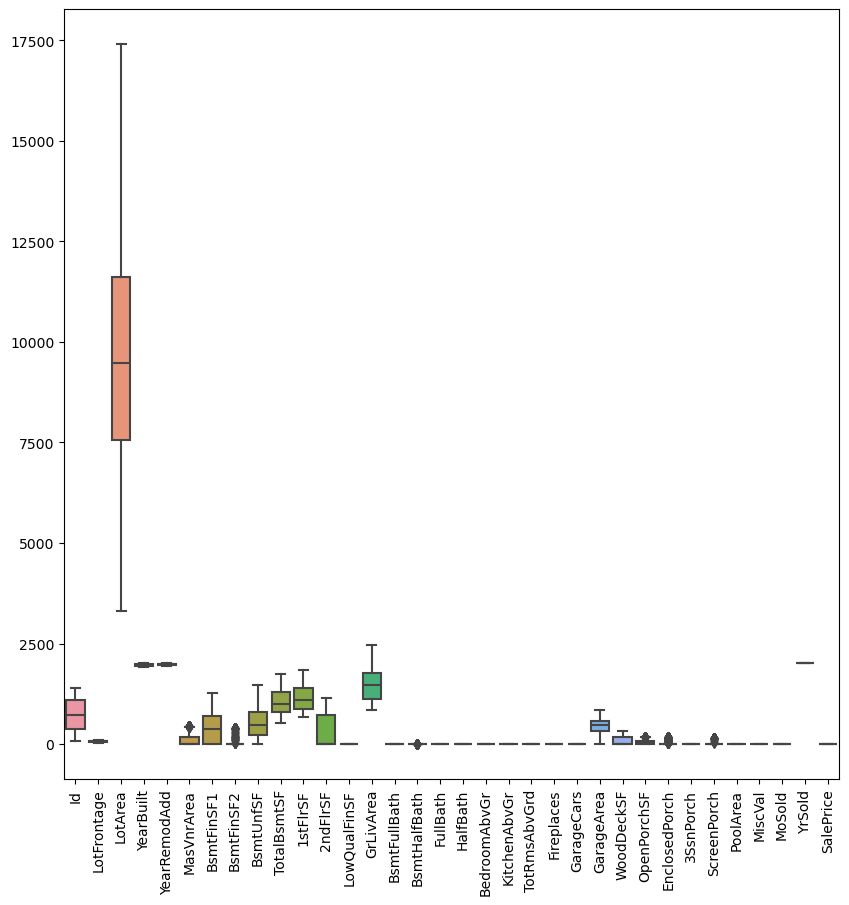

In [759]:
## Check the boxplots again to see if outliers have been treated
plt.figure(figsize=[10,10])
plt.xticks(rotation=90)
sns.boxplot(data=house_num);

In [760]:
house_num.head()

Id  LotFrontage   LotArea  YearBuilt  YearRemodAdd  MasVnrArea  \
0 73.95        65.00  8,450.00       2003          2003      196.00   
1 73.95        80.00  9,600.00       1976          1976        0.00   
2 73.95        68.00 11,250.00       2001          2002      162.00   
3 73.95        60.00  9,550.00       1916          1970        0.00   
4 73.95        84.00 14,260.00       2000          2000      350.00   

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
0         706        0.00        150       856.00    856.00    854.00   
1         978        0.00        284     1,262.00  1,262.00      0.00   
2         486        0.00        434       920.00    920.00    866.00   
3         216        0.00        540       756.00    961.00    756.00   
4         655        0.00        490     1,145.00  1,145.00  1,053.00   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0             0   1,710.00             1             0         2         1   
1             0   1,262.00             0             1         2         0   
2             0   1,786.00             1             0         2         1   
3             0   1,717.00             1             0         1         0   
4             0   2,198.00             1             0         2         1   

   BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  \
0             3             1             8           0           2   
1             3             1             6           1           2   
2             3             1             6           1           2   
3             3             1             7           1           3   
4             4             1             9           1           3   

   GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0      548.00           0        61.00           0.00          0            0   
1      460.00         298         0.00           0.00          0            0   
2      608.00           0        42.00           0.00          0            0   
3      642.00           0        35.00         180.15          0            0   
4      836.00         192        84.00           0.00          0            0   

   PoolArea  MiscVal  MoSold  YrSold  SalePrice  
0         0        0       2    2008      12.25  
1         0        0       5    2007      12.11  
2         0        0       9    2008      12.32  
3         0        0       2    2006      11.85  
4         0        0      11    2008      12.43

In [761]:
## Concatenate the outlier treated numerical columns with one hot encoded categorical columns
house = pd.concat([house_num, house_cat], axis=1)


In [762]:
house.shape

(1460, 81)

In [763]:
house.head()

Id  LotFrontage   LotArea  YearBuilt  YearRemodAdd  MasVnrArea  \
0 73.95        65.00  8,450.00       2003          2003      196.00   
1 73.95        80.00  9,600.00       1976          1976        0.00   
2 73.95        68.00 11,250.00       2001          2002      162.00   
3 73.95        60.00  9,550.00       1916          1970        0.00   
4 73.95        84.00 14,260.00       2000          2000      350.00   

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
0         706        0.00        150       856.00    856.00    854.00   
1         978        0.00        284     1,262.00  1,262.00      0.00   
2         486        0.00        434       920.00    920.00    866.00   
3         216        0.00        540       756.00    961.00    756.00   
4         655        0.00        490     1,145.00  1,145.00  1,053.00   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0             0   1,710.00             1             0         2         1   
1             0   1,262.00             0             1         2         0   
2             0   1,786.00             1             0         2         1   
3             0   1,717.00             1             0         1         0   
4             0   2,198.00             1             0         2         1   

   BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  \
0             3             1             8           0           2   
1             3             1             6           1           2   
2             3             1             6           1           2   
3             3             1             7           1           3   
4             4             1             9           1           3   

   GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0      548.00           0        61.00           0.00          0            0   
1      460.00         298         0.00           0.00          0            0   
2      608.00           0        42.00           0.00          0            0   
3      642.00           0        35.00         180.15          0            0   
4      836.00         192        84.00           0.00          0            0   

   PoolArea  MiscVal  MoSold  YrSold  SalePrice  MSSubClass  MSZoning  Street  \
0         0        0       2    2008      12.25           5         3       1   
1         0        0       5    2007      12.11           0         3       1   
2         0        0       9    2008      12.32           5         3       1   
3         0        0       2    2006      11.85           6         3       1   
4         0        0      11    2008      12.43           5         3       1   

   Alley  LotShape  LandContour  Utilities  LotConfig  LandSlope  \
0      1         3            3          0          4          0   
1      1         3            3          0          2          0   
2      1         0            3          0          4          0   
3      1         0            3          0          0          0   
4      1         0            3          0          2          0   

   Neighborhood  Condition1  Condition2  BldgType  HouseStyle  OverallQual  \
0             5           2           2         0           5            6   
1            24           1           2         0           2            5   
2             5           2           2         0           5            6   
3             6           2           2         0           5            6   
4            15           2           2         0           5            7   

   OverallCond  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0            4          1         1           12           13           1   
1            7          1         1            8            8           3   
2            4          1         1           12           13           1   
3            4          1         1           13           15           3   
4     

In [764]:
## Replacing missing values in the above mentioned two columns by their means
house['LotFrontage'].fillna(house['LotFrontage'].mean(), inplace=True)
house['MasVnrArea'].fillna(house['MasVnrArea'].mean(), inplace=True)


In [765]:
house.isna().sum()

Id               0
LotFrontage      0
LotArea          0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
MSSubClass       0
MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
RoofStyle        0
RoofMatl         0
Exterior1st 

### Step 5: Model Building, Tuning and Evaluation 

In [766]:
#splitting the data into dependent and independent variables
X = house.drop(["Id", "SalePrice"], axis=1)
X.head()

LotFrontage   LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0        65.00  8,450.00       2003          2003      196.00         706   
1        80.00  9,600.00       1976          1976        0.00         978   
2        68.00 11,250.00       2001          2002      162.00         486   
3        60.00  9,550.00       1916          1970        0.00         216   
4        84.00 14,260.00       2000          2000      350.00         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0        0.00        150       856.00    856.00    854.00             0   
1        0.00        284     1,262.00  1,262.00      0.00             0   
2        0.00        434       920.00    920.00    866.00             0   
3        0.00        540       756.00    961.00    756.00             0   
4        0.00        490     1,145.00  1,145.00  1,053.00             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0   1,710.00             1             0         2         1             3   
1   1,262.00             0             1         2         0             3   
2   1,786.00             1             0         2         1             3   
3   1,717.00             1             0         1         0             3   
4   2,198.00             1             0         2         1             4   

   KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  \
0             1             8           0           2      548.00           0   
1             1             6           1           2      460.00         298   
2             1             6           1           2      608.00           0   
3             1             7           1           3      642.00           0   
4             1             9           1           3      836.00         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0        61.00           0.00          0            0         0        0   
1         0.00           0.00          0            0         0        0   
2        42.00           0.00          0            0         0        0   
3        35.00         180.15          0            0         0        0   
4        84.00           0.00          0            0         0        0   

   MoSold  YrSold  MSSubClass  MSZoning  Street  Alley  LotShape  LandContour  \
0       2    2008           5         3       1      1         3            3   
1       5    2007           0         3       1      1         3            3   
2       9    2008           5         3       1      1         0            3   
3       2    2006           6         3       1      1         0            3   
4      11    2008           5         3       1      1         0            3   

   Utilities  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  \
0          0          4          0             5           2           2   
1          0          2          0            24           1           2   
2          0          4          0             5           2           2   
3          0          0          0             6           2           2   
4          0          2          0            15           2           2   

   BldgType  HouseStyle  OverallQual  OverallCond  RoofStyle  RoofMatl  \
0         0           5            6            4          1         1   
1         0           2            5            7          1         1   
2         0           5            6            4          1         1   
3         0           5            6            4          1         1   
4         0           5            7            4          1         1   

   Exterior1st  Exterior2nd  MasVnrType  ExterQual  ExterCond  Foundation  \
0           12           13           1          2          4           2   
1            8            8           3          3          4           1   
2           12           13           1          2      

In [767]:
X.shape

(1460, 79)

In [768]:
y = house["SalePrice"]
y.head()

0   12.25
1   12.11
2   12.32
3   11.85
4   12.43
Name: SalePrice, dtype: float64

### 5.Model building and Evaluating

In [769]:
from sklearn.model_selection import train_test_split

In [770]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [771]:
## View dimensions of train data
print(X_train.shape)
print(X_test.shape)

(1021, 79)
(438, 79)


In [772]:
## Create a list of numerical columns to be scaled
num_cols = list(X_train.select_dtypes(include=['int64', 'float64']).columns)
num_cols

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

#### Scaling numerical columns


In [773]:
## Create a scaling instance
scaler = StandardScaler()

## Scale the numerical columns 
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

#### Model 1: Ridge Regression


In [774]:
## Now to create a Ridge Regression model
## we will run a cross validation on a list of alphas to find the optimum value of alpha

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

ridge = Ridge()

# cross validation

ridgeCV = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
ridgeCV.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [775]:
print(ridgeCV.best_params_)

{'alpha': 50}


In [776]:
alpha = 50
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 1.36837927e-03  2.03970314e-02  3.10135277e-02  2.26379554e-02
  6.29367817e-04  1.23102530e-02 -2.49775001e-03 -2.44691948e-03
  5.62133850e-02  1.36267752e-02  2.59529918e-02  0.00000000e+00
  7.38012798e-02  1.60422087e-02 -1.76785745e-04  1.28238967e-02
  1.06172948e-02  1.15994547e-03  0.00000000e+00 -2.23076021e-03
  2.51194947e-02  1.18897579e-02  1.77254938e-02  1.04173244e-02
  3.12390186e-03  4.50181997e-03  0.00000000e+00  7.28574792e-03
  0.00000000e+00  0.00000000e+00  2.74807075e-03 -4.18894504e-03
 -3.11194350e-03 -2.74412607e-02  4.34324769e-03  1.37724609e-02
 -5.74314110e-03  6.07364999e-03 -1.07295954e-03  2.73163660e-03
  3.04264684e-02  5.35049093e-04  4.37979584e-04 -1.48306104e-02
 -1.43714728e-03  1.29518238e-04  5.23338917e-02  3.32894903e-02
 -1.17948210e-04  7.64616714e-03 -1.61592577e-03  2.61968930e-03
  1.13994479e-03  4.54518741e-03  2.44698998e-03  1.21018713e-02
 -8.59392264e-03  3.34973615e-03 -6.24611057e-03 -5.02201799e-03
  2.40862786e-06 -8.80115

In [777]:
# Compute,Display ?& Store various metrics related to accuracy 
def compute_and_display_metrics(y_train,y_pred_train,y_test,y_pred_test,metric):
    r2_train_lr = r2_score(y_train, y_pred_train)
    print(f"R2 Train : {r2_train_lr}")
    metric.append(r2_train_lr)

    r2_test_lr = r2_score(y_test, y_pred_test)
    print(f"R2 Test : {r2_test_lr}")
    metric.append(r2_test_lr)

    rss1_lr = np.sum(np.square(y_train - y_pred_train))
    print(f"RSS Train : {rss1_lr}")
    metric.append(rss1_lr)

    rss2_lr = np.sum(np.square(y_test - y_pred_test))
    print(f"RSS Test : {rss2_lr}")
    metric.append(rss2_lr)

    mse_train_lr = mean_squared_error(y_train, y_pred_train)
    print(f"MSE Train : {mse_train_lr}")
    metric.append(mse_train_lr**0.5)

    mse_test_lr = mean_squared_error(y_test, y_pred_test)
    print(f"MSE. Test : {mse_test_lr}")
    metric.append(mse_test_lr**0.5)


In [778]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

ridge_metrics = []
compute_and_display_metrics(y_train,y_pred_train,y_test,y_pred_test,ridge_metrics)

R2 Train : 0.9144076332632772
R2 Test : 0.8803591077565015
RSS Train : 10.907496555586182
RSS Test : 6.444742292158896
MSE Train : 0.010683150397244056
MSE. Test : 0.014714023498079671


In [779]:
ridgeCV.cv_results_

{'mean_fit_time': array([0.0273829 , 0.02248588, 0.02714357, 0.01938848, 0.02437353,
        0.01933341, 0.02074566, 0.02675366, 0.02121978, 0.01756072,
        0.02353792, 0.02174273, 0.02194185, 0.02094426, 0.02214036,
        0.0207695 , 0.02134047, 0.02211328, 0.02593169, 0.01992025,
        0.01954761, 0.01835079, 0.0213419 , 0.02134194, 0.01977301,
        0.02174597, 0.02413607, 0.02211261]),
 'std_fit_time': array([0.00479382, 0.00338306, 0.0086579 , 0.00294253, 0.00593695,
        0.00104095, 0.00364487, 0.00262453, 0.00212761, 0.00049462,
        0.00286234, 0.00277754, 0.00209319, 0.00218442, 0.00247585,
        0.00171821, 0.0034863 , 0.00608086, 0.00743692, 0.00230899,
        0.00223809, 0.00360043, 0.00597098, 0.00506942, 0.00196293,
        0.00421497, 0.00477997, 0.00413278]),
 'mean_score_time': array([0.01276627, 0.0132369 , 0.0145452 , 0.0095335 , 0.01539617,
        0.01097007, 0.01019692, 0.01473384, 0.01209898, 0.01475244,
        0.01336379, 0.01199136, 0.011568

In [780]:
## Create a dataframe of ridge cross validation results
ridgeCV_results= pd.DataFrame(ridgeCV.cv_results_)
ridgeCV_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0            0.03          0.00             0.01            0.00        0.00   
1            0.02          0.00             0.01            0.00        0.00   
2            0.03          0.01             0.01            0.00        0.01   
3            0.02          0.00             0.01            0.00        0.05   
4            0.02          0.01             0.02            0.01        0.10   
5            0.02          0.00             0.01            0.00        0.20   
6            0.02          0.00             0.01            0.00        0.30   
7            0.03          0.00             0.01            0.00        0.40   
8            0.02          0.00             0.01            0.00        0.50   
9            0.02          0.00             0.01            0.01        0.60   
10           0.02          0.00             0.01            0.00        0.70   
11           0.02          0.00             0.01            0.00        0.80   
12           0.02          0.00             0.01            0.00        0.90   
13           0.02          0.00             0.02            0.00        1.00   
14           0.02          0.00             0.01            0.00        2.00   
15           0.02          0.00             0.01            0.00        3.00   
16           0.02          0.00             0.01            0.00        4.00   
17           0.02          0.01             0.01            0.00        5.00   
18           0.03          0.01             0.02            0.00        6.00   
19           0.02          0.00             0.01            0.00        7.00   
20           0.02          0.00             0.01            0.01        8.00   
21           0.02          0.00             0.01            0.00        9.00   
22           0.02          0.01             0.02            0.00       10.00   
23           0.02          0.01             0.01            0.01          20   
24           0.02          0.00             0.01            0.00          50   
25           0.02          0.00             0.01            0.00         100   
26           0.02          0.00             0.01            0.00         500   
27           0.02          0.00             0.01            0.00        1000   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}              -0.08              -0.09   
1    {'alpha': 0.001}              -0.08              -0.09   
2     {'alpha': 0.01}              -0.08              -0.09   
3     {'alpha': 0.05}              -0.08              -0.09   
4      {'alpha': 0.1}              -0.08              -0.09   
5      {'alpha': 0.2}              -0.08              -0.09   
6      {'alpha': 0.3}              -0.08              -0.09   
7      {'alpha': 0.4}              -0.08              -0.09   
8      {'alpha': 0.5}              -0.08              -0.09   
9      {'alpha': 0.6}              -0.08              -0.09   
10     {'alpha': 0.7}              -0.08              -0.09   
11     {'alpha': 0.8}              -0.08              -0.09   
12     {'alpha': 0.9}              -0.08              -0.09   
13     {'alpha': 1.0}              -0.08              -0.09   
14     {'alpha': 2.0}              -0.08              -0.09   
15     {'alpha': 3.0}              -0.08              -0.09   
16     {'alpha': 4.0}              -0.08              -0.09   
17     {'alpha': 5.0}              -0.08              -0.09   
18     {'alpha': 6.0}              -0.08              -0.09   
19     {'alpha': 7.0}              -0.08              -0.09   
20     {'alpha': 8.0}              -0.08              -0.09   
21     {'alpha': 9.0}              -0.08              -0.09   
22    {'alpha': 10.0}              -0.08              -0.09   
23      {'alpha': 20}              -0.08              -0.09   
24      {'alpha': 50}              -0.08              -0.09   
25     {'alpha': 100}              -0.08     

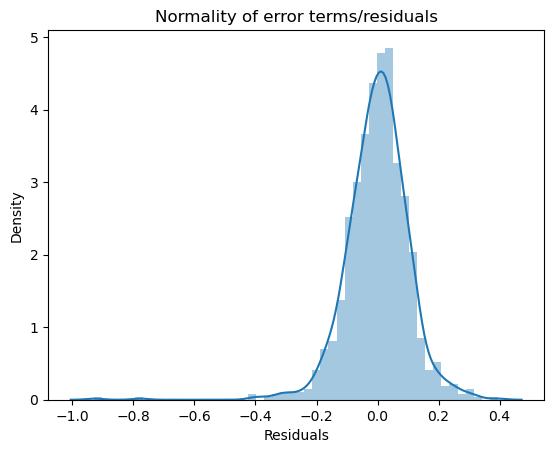

In [781]:
# Distribution of errors -- Normally distributed 
y_res=y_train- y_pred_train
p = sns.distplot(y_res,kde=True)

p = plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

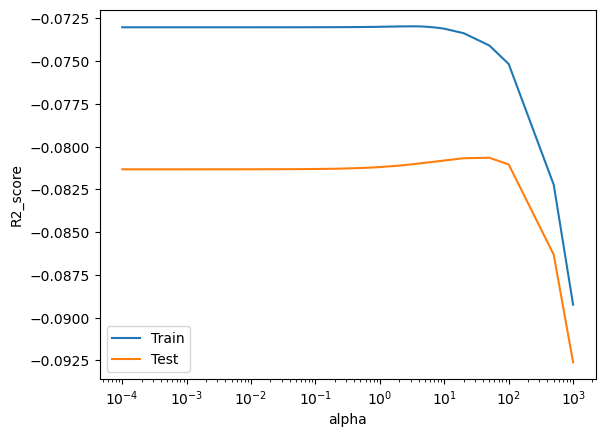

In [782]:
## Plotting R2 score vs alpha values
plt.plot(ridgeCV_results['param_alpha'], ridgeCV_results['mean_train_score'], label='Train')
plt.plot(ridgeCV_results['param_alpha'], ridgeCV_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()


In [783]:
## Now to create a Lasso model
## we will run a cross validation on a list of alphas to find the optimum value of alpha

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

lasso = Lasso()

# cross validation

lassoCV = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
lassoCV.fit(X_train, y_train) 



Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [784]:
## View the optimal value of alpha
lassoCV.best_params_

{'alpha': 0.001}

In [785]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [786]:
lasso.coef_

array([ 0.00000000e+00,  1.93862333e-02,  4.34555767e-02,  2.19177490e-02,
       -0.00000000e+00,  1.20117998e-03, -4.96669956e-03, -1.31091857e-02,
        6.95137334e-02, -7.02233161e-03,  4.31800890e-03,  0.00000000e+00,
        1.11704316e-01,  1.52344889e-02, -0.00000000e+00,  5.51283948e-03,
        7.02347067e-03, -0.00000000e+00,  0.00000000e+00, -4.79509543e-03,
        2.50176149e-02,  1.08210731e-02,  1.75215994e-02,  8.95869224e-03,
        8.99439987e-04,  3.39612645e-03,  0.00000000e+00,  6.18885202e-03,
        0.00000000e+00,  0.00000000e+00,  1.38003393e-03, -3.45109469e-03,
       -3.17009076e-03, -3.12463702e-02,  0.00000000e+00,  1.43539571e-03,
       -4.92148550e-03,  5.48598337e-03, -0.00000000e+00,  2.32390812e-03,
        3.93533672e-02,  3.66319429e-04,  8.78194490e-05, -1.07862531e-02,
       -8.05153962e-04,  4.26504945e-04,  5.38190706e-02,  3.61450670e-02,
       -5.38153815e-04,  4.93527229e-03, -9.07648432e-04,  2.08821037e-03,
        2.67924480e-04,  

In [787]:
lasso.intercept_

11.533153348374805

In [788]:
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

lasso_metrics = []
compute_and_display_metrics(y_train,y_pred_train,y_test,y_pred_test,lasso_metrics)

R2 Train : 0.9152358117181585
R2 Test : 0.8798678814058453
RSS Train : 10.801957311977993
RSS Test : 6.471203372294054
MSE Train : 0.010579781892240934
MSE. Test : 0.014774436923045786


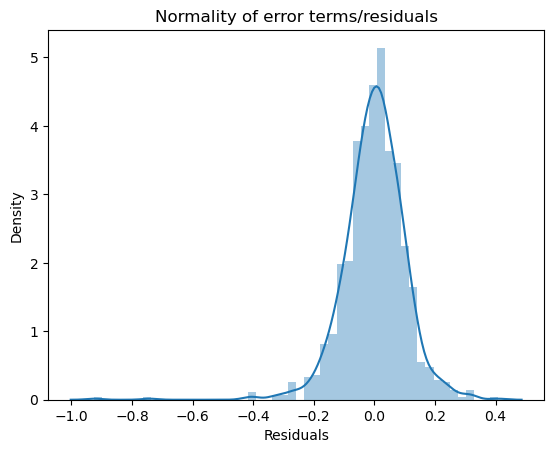

In [789]:
# Distribution of errors - Normally distributed 
y_res=y_train- y_pred_train
p = sns.distplot(y_res,kde=True)

p = plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

In [790]:
## View the results of cross validation search
lassoCV.cv_results_

{'mean_fit_time': array([0.04408188, 0.03849807, 0.02771754, 0.02036262, 0.02496381,
        0.02273951, 0.0227387 , 0.02214189, 0.01994534, 0.0199286 ,
        0.02393656, 0.01954851, 0.02087774, 0.02214074, 0.02253947,
        0.01875067, 0.02373767, 0.02393603, 0.02214088, 0.01975055,
        0.02333794, 0.01855011, 0.02254024, 0.02014503, 0.02114253,
        0.02613082, 0.01954765, 0.02114391]),
 'std_fit_time': array([0.00558599, 0.00629547, 0.0041494 , 0.00204268, 0.0072055 ,
        0.00369896, 0.00477907, 0.00420349, 0.0017826 , 0.00291006,
        0.00178339, 0.0018506 , 0.00265477, 0.00193455, 0.00669409,
        0.00230851, 0.00405915, 0.00578442, 0.00525493, 0.00222058,
        0.00119838, 0.0018496 , 0.00401988, 0.00212953, 0.00230988,
        0.00744709, 0.00241083, 0.00318042]),
 'mean_score_time': array([0.01039486, 0.01595602, 0.01236711, 0.01319442, 0.01196675,
        0.01436186, 0.01059933, 0.01455932, 0.0137846 , 0.0133636 ,
        0.01695399, 0.01156831, 0.012033

In [791]:
## Create a dataframe of ridge cross validation results
lassoCV_results= pd.DataFrame(lassoCV.cv_results_)
lassoCV_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0            0.04          0.01             0.01            0.00        0.00   
1            0.04          0.01             0.02            0.00        0.00   
2            0.03          0.00             0.01            0.00        0.01   
3            0.02          0.00             0.01            0.00        0.05   
4            0.02          0.01             0.01            0.00        0.10   
5            0.02          0.00             0.01            0.00        0.20   
6            0.02          0.00             0.01            0.00        0.30   
7            0.02          0.00             0.01            0.01        0.40   
8            0.02          0.00             0.01            0.01        0.50   
9            0.02          0.00             0.01            0.00        0.60   
10           0.02          0.00             0.02            0.00        0.70   
11           0.02          0.00             0.01            0.00        0.80   
12           0.02          0.00             0.01            0.00        0.90   
13           0.02          0.00             0.02            0.00        1.00   
14           0.02          0.01             0.01            0.00        2.00   
15           0.02          0.00             0.01            0.00        3.00   
16           0.02          0.00             0.02            0.00        4.00   
17           0.02          0.01             0.01            0.00        5.00   
18           0.02          0.01             0.01            0.00        6.00   
19           0.02          0.00             0.01            0.00        7.00   
20           0.02          0.00             0.02            0.00        8.00   
21           0.02          0.00             0.01            0.00        9.00   
22           0.02          0.00             0.01            0.01       10.00   
23           0.02          0.00             0.01            0.00          20   
24           0.02          0.00             0.02            0.01          50   
25           0.03          0.01             0.01            0.00         100   
26           0.02          0.00             0.01            0.00         500   
27           0.02          0.00             0.01            0.00        1000   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}              -0.08              -0.09   
1    {'alpha': 0.001}              -0.08              -0.09   
2     {'alpha': 0.01}              -0.08              -0.09   
3     {'alpha': 0.05}              -0.11              -0.12   
4      {'alpha': 0.1}              -0.15              -0.15   
5      {'alpha': 0.2}              -0.20              -0.20   
6      {'alpha': 0.3}              -0.26              -0.25   
7      {'alpha': 0.4}              -0.26              -0.25   
8      {'alpha': 0.5}              -0.26              -0.26   
9      {'alpha': 0.6}              -0.26              -0.26   
10     {'alpha': 0.7}              -0.26              -0.26   
11     {'alpha': 0.8}              -0.27              -0.26   
12     {'alpha': 0.9}              -0.27              -0.26   
13     {'alpha': 1.0}              -0.27              -0.26   
14     {'alpha': 2.0}              -0.28              -0.27   
15     {'alpha': 3.0}              -0.29              -0.28   
16     {'alpha': 4.0}              -0.30              -0.29   
17     {'alpha': 5.0}              -0.30              -0.29   
18     {'alpha': 6.0}              -0.30              -0.29   
19     {'alpha': 7.0}              -0.30              -0.29   
20     {'alpha': 8.0}              -0.30              -0.29   
21     {'alpha': 9.0}              -0.30              -0.29   
22    {'alpha': 10.0}              -0.30              -0.29   
23      {'alpha': 20}              -0.30              -0.29   
24      {'alpha': 50}              -0.30              -0.29   
25     {'alpha': 100}              -0.30     

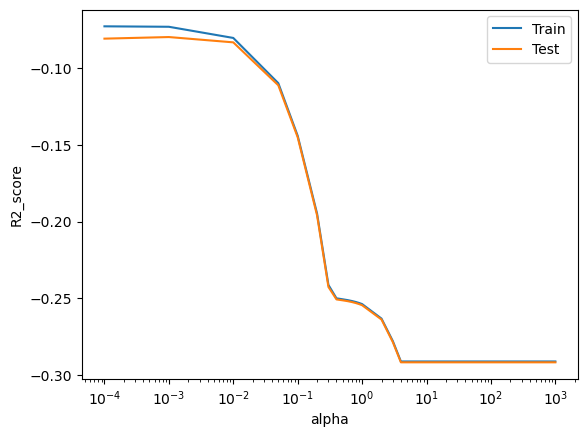

In [792]:
## Plotting R2 score vs alpha values
plt.plot(lassoCV_results['param_alpha'], lassoCV_results['mean_train_score'], label='Train')
plt.plot(lassoCV_results['param_alpha'], lassoCV_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()

In [793]:
# Lasso Model Parameters Weightage
Lasso_parameters = list(sorted(lasso.coef_))
Lasso_parameters.insert(0, lasso.intercept_)
Lasso_parameters = [round(x, 3) for x in Lasso_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, Lasso_parameters))

[('constant', 11.533),
 ('LotFrontage', -0.031),
 ('LotArea', -0.013),
 ('YearBuilt', -0.011),
 ('YearRemodAdd', -0.009),
 ('MasVnrArea', -0.009),
 ('BsmtFinSF1', -0.008),
 ('BsmtFinSF2', -0.007),
 ('BsmtUnfSF', -0.007),
 ('TotalBsmtSF', -0.006),
 ('1stFlrSF', -0.005),
 ('2ndFlrSF', -0.005),
 ('LowQualFinSF', -0.005),
 ('GrLivArea', -0.005),
 ('BsmtFullBath', -0.005),
 ('BsmtHalfBath', -0.005),
 ('FullBath', -0.003),
 ('HalfBath', -0.003),
 ('BedroomAbvGr', -0.003),
 ('KitchenAbvGr', -0.002),
 ('TotRmsAbvGrd', -0.001),
 ('Fireplaces', -0.001),
 ('GarageCars', -0.001),
 ('GarageArea', 0.0),
 ('WoodDeckSF', -0.0),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', -0.0),
 ('3SsnPorch', -0.0),
 ('ScreenPorch', 0.0),
 ('PoolArea', 0.0),
 ('MiscVal', 0.0),
 ('MoSold', 0.0),
 ('YrSold', 0.0),
 ('MSSubClass', -0.0),
 ('MSZoning', -0.0),
 ('Street', 0.0),
 ('Alley', 0.0),
 ('LotShape', 0.0),
 ('LandContour', 0.0),
 ('Utilities', 0.0),
 ('LotConfig', 0.0),
 ('LandSlope', 0.0),
 ('Neighborhood', 0.0),
 (

In [794]:
## Making table of all variable for Model output comparison

Weight = pd.DataFrame(index=X.columns)
Weight.rows = X.columns
Weight

## Filling the Coefficient data
Weight['Ridge'] = ridge.coef_
Weight['Lasso'] = lasso.coef_

## View the coefficients
Weight

Ridge  Lasso
LotFrontage     0.00   0.00
LotArea         0.02   0.02
YearBuilt       0.03   0.04
YearRemodAdd    0.02   0.02
MasVnrArea      0.00  -0.00
BsmtFinSF1      0.01   0.00
BsmtFinSF2     -0.00  -0.00
BsmtUnfSF      -0.00  -0.01
TotalBsmtSF     0.06   0.07
1stFlrSF        0.01  -0.01
2ndFlrSF        0.03   0.00
LowQualFinSF    0.00   0.00
GrLivArea       0.07   0.11
BsmtFullBath    0.02   0.02
BsmtHalfBath   -0.00  -0.00
FullBath        0.01   0.01
HalfBath        0.01   0.01
BedroomAbvGr    0.00  -0.00
KitchenAbvGr    0.00   0.00
TotRmsAbvGrd   -0.00  -0.00
Fireplaces      0.03   0.03
GarageCars      0.01   0.01
GarageArea      0.02   0.02
WoodDeckSF      0.01   0.01
OpenPorchSF     0.00   0.00
EnclosedPorch   0.00   0.00
3SsnPorch       0.00   0.00
ScreenPorch     0.01   0.01
PoolArea        0.00   0.00
MiscVal         0.00   0.00
MoSold          0.00   0.00
YrSold         -0.00  -0.00
MSSubClass     -0.00  -0.00
MSZoning       -0.03  -0.03
Street          0.00   0.00
Alley           0.01   0.00
LotShape       -0.01  -0.00
LandContour     0.01   0.01
Utilities      -0.00  -0.00
LotConfig       0.00   0.00
LandSlope       0.03   0.04
Neighborhood    0.00   0.00
Condition1      0.00   0.00
Condition2     -0.01  -0.01
BldgType       -0.00  -0.00
HouseStyle      0.00   0.00
OverallQual     0.05   0.05
OverallCond     0.03   0.04
RoofStyle      -0.00  -0.00
RoofMatl        0.01   0.00
Exterior1st    -0.00  -0.00
Exterior2nd     0.00   0.00
MasVnrType      0.00   0.00
ExterQual       0.00   0.00
ExterCond       0.00   0.00
Foundation      0.01   0.01
BsmtQual       -0.01  -0.01
BsmtCond        0.00   0.00
BsmtExposure   -0.01  -0.00
BsmtFinType1   -0.01  -0.01
BsmtFinType2    0.00   0.00
Heating        -0.01  -0.00
HeatingQC      -0.01  -0.01
CentralAir      0.01   0.00
Electrical     -0.00  -0.00
KitchenQual    -0.01  -0.01
Functional      0.01   0.01
FireplaceQu    -0.01  -0.00
GarageType     -0.01  -0.01
GarageYrBlt     0.00   0.00
GarageFinish   -0.01  -0.01
GarageQual      0.01   0.01
GarageCond      0.00   0.00
PavedDrive      0.01   0.00
PoolQC          0.02   0.01
Fence           0.00   0.00
MiscFeature    -0.01  -0.00
SaleType        0.00   0.00
SaleCondition   0.01   0.01

In [795]:
## View the number of features removed by lasso
Weight[Weight['Lasso']==0].shape

(13, 2)

The above 13 features out of 79 (from X_train) have been removed by Lasso. In this way, lasso performs feature selection

In [796]:
## View the features selected by lasso
Weight.loc[Weight['Lasso']!=0, 'Lasso']

LotArea          0.02
YearBuilt        0.04
YearRemodAdd     0.02
BsmtFinSF1       0.00
BsmtFinSF2      -0.00
BsmtUnfSF       -0.01
TotalBsmtSF      0.07
1stFlrSF        -0.01
2ndFlrSF         0.00
GrLivArea        0.11
BsmtFullBath     0.02
FullBath         0.01
HalfBath         0.01
TotRmsAbvGrd    -0.00
Fireplaces       0.03
GarageCars       0.01
GarageArea       0.02
WoodDeckSF       0.01
OpenPorchSF      0.00
EnclosedPorch    0.00
ScreenPorch      0.01
MoSold           0.00
YrSold          -0.00
MSSubClass      -0.00
MSZoning        -0.03
Alley            0.00
LotShape        -0.00
LandContour      0.01
LotConfig        0.00
LandSlope        0.04
Neighborhood     0.00
Condition1       0.00
Condition2      -0.01
BldgType        -0.00
HouseStyle       0.00
OverallQual      0.05
OverallCond      0.04
RoofStyle       -0.00
RoofMatl         0.00
Exterior1st     -0.00
Exterior2nd      0.00
MasVnrType       0.00
ExterQual        0.00
ExterCond        0.00
Foundation       0.01
BsmtQual  

### As oberserved, Ridge performed well compared to Lasso

In [797]:
## View the top 10 features's coefficent of Ridge
Weight['Ridge'].sort_values(ascending=False)[:10]

GrLivArea      0.07
TotalBsmtSF    0.06
OverallQual    0.05
OverallCond    0.03
YearBuilt      0.03
LandSlope      0.03
2ndFlrSF       0.03
Fireplaces     0.03
YearRemodAdd   0.02
LotArea        0.02
Name: Ridge, dtype: float64

In [798]:
## View the top 10 features's coefficent of Lasso
Weight['Lasso'].sort_values(ascending=False)[:10]

GrLivArea      0.11
TotalBsmtSF    0.07
OverallQual    0.05
YearBuilt      0.04
LandSlope      0.04
OverallCond    0.04
Fireplaces     0.03
YearRemodAdd   0.02
LotArea        0.02
GarageArea     0.02
Name: Lasso, dtype: float64

In [799]:
## Making table of all variable for Model output comparison

Weight = pd.DataFrame(index=X.columns)
Weight.rows = X.columns
Weight

## Filling the Coefficient data
Weight['Ridge'] = ridge.coef_
Weight['Lasso'] = lasso.coef_


## View the coefficients
Weight

Ridge  Lasso
LotFrontage     0.00   0.00
LotArea         0.02   0.02
YearBuilt       0.03   0.04
YearRemodAdd    0.02   0.02
MasVnrArea      0.00  -0.00
BsmtFinSF1      0.01   0.00
BsmtFinSF2     -0.00  -0.00
BsmtUnfSF      -0.00  -0.01
TotalBsmtSF     0.06   0.07
1stFlrSF        0.01  -0.01
2ndFlrSF        0.03   0.00
LowQualFinSF    0.00   0.00
GrLivArea       0.07   0.11
BsmtFullBath    0.02   0.02
BsmtHalfBath   -0.00  -0.00
FullBath        0.01   0.01
HalfBath        0.01   0.01
BedroomAbvGr    0.00  -0.00
KitchenAbvGr    0.00   0.00
TotRmsAbvGrd   -0.00  -0.00
Fireplaces      0.03   0.03
GarageCars      0.01   0.01
GarageArea      0.02   0.02
WoodDeckSF      0.01   0.01
OpenPorchSF     0.00   0.00
EnclosedPorch   0.00   0.00
3SsnPorch       0.00   0.00
ScreenPorch     0.01   0.01
PoolArea        0.00   0.00
MiscVal         0.00   0.00
MoSold          0.00   0.00
YrSold         -0.00  -0.00
MSSubClass     -0.00  -0.00
MSZoning       -0.03  -0.03
Street          0.00   0.00
Alley           0.01   0.00
LotShape       -0.01  -0.00
LandContour     0.01   0.01
Utilities      -0.00  -0.00
LotConfig       0.00   0.00
LandSlope       0.03   0.04
Neighborhood    0.00   0.00
Condition1      0.00   0.00
Condition2     -0.01  -0.01
BldgType       -0.00  -0.00
HouseStyle      0.00   0.00
OverallQual     0.05   0.05
OverallCond     0.03   0.04
RoofStyle      -0.00  -0.00
RoofMatl        0.01   0.00
Exterior1st    -0.00  -0.00
Exterior2nd     0.00   0.00
MasVnrType      0.00   0.00
ExterQual       0.00   0.00
ExterCond       0.00   0.00
Foundation      0.01   0.01
BsmtQual       -0.01  -0.01
BsmtCond        0.00   0.00
BsmtExposure   -0.01  -0.00
BsmtFinType1   -0.01  -0.01
BsmtFinType2    0.00   0.00
Heating        -0.01  -0.00
HeatingQC      -0.01  -0.01
CentralAir      0.01   0.00
Electrical     -0.00  -0.00
KitchenQual    -0.01  -0.01
Functional      0.01   0.01
FireplaceQu    -0.01  -0.00
GarageType     -0.01  -0.01
GarageYrBlt     0.00   0.00
GarageFinish   -0.01  -0.01
GarageQual      0.01   0.01
GarageCond      0.00   0.00
PavedDrive      0.01   0.00
PoolQC          0.02   0.01
Fence           0.00   0.00
MiscFeature    -0.01  -0.00
SaleType        0.00   0.00
SaleCondition   0.01   0.01

#### Question 1
What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

#### Answer:
Optimal value of lambda for Ridge Regression = 50
<br>Optimal value of lambda for Lasso = 0.001

In [800]:
## Let us build the ridge regression model with double value of alpha i.e. 20
ridge = Ridge(alpha=100)

# Fit the model on training data
ridge.fit(X_train, y_train)

Ridge(alpha=100)

In [801]:
## Make predictions
y_train_pred = ridge.predict(X_train)
y_pred = ridge.predict(X_test)

In [802]:
## Check metrics
ridge_metrics = compute_and_display_metrics(y_train, y_train_pred, y_test, y_pred,ridge_metrics)

R2 Train : 0.9123091311492253
R2 Test : 0.8798749650038801
RSS Train : 11.174919988931812
RSS Test : 6.470821797374479
MSE Train : 0.010945073446554175
MSE. Test : 0.014773565747430318


In [803]:
## Now we will build the lasso model with double value of alpha i.e. 0.002
lasso = Lasso(alpha=0.002)

# Fit the model on training data
lasso.fit(X_train, y_train)

Lasso(alpha=0.002)

In [804]:
## Make predictions
y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

In [805]:
## Check metrics
lasso_metrics = compute_and_display_metrics(y_train, y_train_pred, y_test, y_pred,lasso_metrics)

R2 Train : 0.91262594840633
R2 Test : 0.8801764776682574
RSS Train : 11.134546258512009
RSS Test : 6.454580097874455
MSE Train : 0.010905530125868765
MSE. Test : 0.0147364842417225


Changes in Ridge Regression metrics:
<br>R2 score of train set decreased from 0.914 to 0.912
<br>R2 score of test set remained same at 0.88

Changes in Lasso metrics:
<br>R2 score of train set remains the same 0.91
<br>R2 score of test set remains same 88

In [806]:
## Now we see the changes in coefficients after regularization

## First create empty datafame with all the independent variables as indices
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns
betas


Empty DataFrame
Columns: []
Index: [LotFrontage, LotArea, YearBuilt, YearRemodAdd, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, MSSubClass, MSZoning, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Heating, HeatingQC, CentralAir, Electrical, KitchenQual, Functional, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond, PavedDrive, PoolQC, Fence, MiscFeature, SaleType, SaleCondition]

In [807]:
## Now fill in the values of betas, one column for ridge coefficients and one for lasso coefficients
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [808]:
## View the betas/coefficients
betas 

Ridge  Lasso
LotFrontage     0.00   0.00
LotArea         0.02   0.02
YearBuilt       0.03   0.04
YearRemodAdd    0.02   0.02
MasVnrArea      0.00  -0.00
BsmtFinSF1      0.02   0.01
BsmtFinSF2     -0.00  -0.00
BsmtUnfSF       0.00  -0.00
TotalBsmtSF     0.05   0.05
1stFlrSF        0.02  -0.00
2ndFlrSF        0.03   0.01
LowQualFinSF    0.00   0.00
GrLivArea       0.06   0.11
BsmtFullBath    0.02   0.01
BsmtHalfBath   -0.00  -0.00
FullBath        0.01   0.00
HalfBath        0.01   0.01
BedroomAbvGr    0.00  -0.00
KitchenAbvGr    0.00   0.00
TotRmsAbvGrd    0.00  -0.00
Fireplaces      0.03   0.03
GarageCars      0.01   0.01
GarageArea      0.02   0.02
WoodDeckSF      0.01   0.01
OpenPorchSF     0.00   0.00
EnclosedPorch   0.00   0.00
3SsnPorch       0.00   0.00
ScreenPorch     0.01   0.01
PoolArea        0.00   0.00
MiscVal         0.00   0.00
MoSold          0.00   0.00
YrSold         -0.00  -0.00
MSSubClass     -0.00  -0.00
MSZoning       -0.02  -0.03
Street          0.00   0.00
Alley           0.01   0.00
LotShape       -0.01  -0.00
LandContour     0.00   0.00
Utilities      -0.00  -0.00
LotConfig       0.00   0.00
LandSlope       0.02   0.03
Neighborhood    0.00   0.00
Condition1      0.00   0.00
Condition2     -0.01  -0.00
BldgType       -0.00  -0.00
HouseStyle      0.00   0.00
OverallQual     0.05   0.05
OverallCond     0.03   0.03
RoofStyle      -0.00  -0.00
RoofMatl        0.01   0.00
Exterior1st    -0.00  -0.00
Exterior2nd     0.00   0.00
MasVnrType      0.00   0.00
ExterQual       0.00   0.00
ExterCond       0.00   0.00
Foundation      0.01   0.01
BsmtQual       -0.01  -0.01
BsmtCond        0.00   0.00
BsmtExposure   -0.01  -0.00
BsmtFinType1   -0.01  -0.01
BsmtFinType2   -0.00   0.00
Heating        -0.01  -0.00
HeatingQC      -0.01  -0.01
CentralAir      0.01   0.00
Electrical     -0.00   0.00
KitchenQual    -0.01  -0.01
Functional      0.01   0.01
FireplaceQu    -0.01  -0.00
GarageType     -0.01  -0.01
GarageYrBlt     0.00   0.00
GarageFinish   -0.01  -0.01
GarageQual      0.01   0.00
GarageCond      0.00   0.00
PavedDrive      0.01   0.00
PoolQC          0.01   0.00
Fence           0.00   0.00
MiscFeature    -0.01  -0.00
SaleType        0.00   0.00
SaleCondition   0.01   0.01

Now, we look at the most important predictor variables after the change is implemented.

In [809]:
## View the top 10 coefficients of Ridge regression in descending order
betas['Ridge'].sort_values(ascending=False)[:10]

GrLivArea      0.06
OverallQual    0.05
TotalBsmtSF    0.05
OverallCond    0.03
2ndFlrSF       0.03
YearBuilt      0.03
Fireplaces     0.03
YearRemodAdd   0.02
LandSlope      0.02
LotArea        0.02
Name: Ridge, dtype: float64

In [810]:
## To interpret the ridge coefficients in terms of target, we have to take inverse log (i.e. e to the power) of betas
ridge_coeffs = np.exp(betas['Ridge'])
ridge_coeffs.sort_values(ascending=False)[:10]

GrLivArea      1.06
OverallQual    1.05
TotalBsmtSF    1.05
OverallCond    1.03
2ndFlrSF       1.03
YearBuilt      1.03
Fireplaces     1.03
YearRemodAdd   1.02
LandSlope      1.02
LotArea        1.02
Name: Ridge, dtype: float64

In [811]:
## View the top 10 coefficients of Lasso in descending order
betas['Lasso'].sort_values(ascending=False)[:10]

GrLivArea      0.11
OverallQual    0.05
TotalBsmtSF    0.05
YearBuilt      0.04
OverallCond    0.03
Fireplaces     0.03
LandSlope      0.03
YearRemodAdd   0.02
LotArea        0.02
GarageArea     0.02
Name: Lasso, dtype: float64

In [812]:
## To interpret the lasso coefficients in terms of target, we have to take inverse log (i.e. 10 to the power) of betas
lasso_coeffs = np.exp(betas['Lasso'])
lasso_coeffs.sort_values(ascending=False)[:10]

GrLivArea      1.11
OverallQual    1.06
TotalBsmtSF    1.05
YearBuilt      1.04
OverallCond    1.03
Fireplaces     1.03
LandSlope      1.03
YearRemodAdd   1.02
LotArea        1.02
GarageArea     1.02
Name: Lasso, dtype: float64

 So, the most important predictor variables after we double the alpha values are:-<br>GrLivArea <br>OverallQual<br>TotalBsmtSF <br>YearBuilt <br>OverallCond<br>Fireplaces <br>LandSlope  <br>YearRemodAdd<br>LotArea  <br> GarageArea

Question 3

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

Here, we will drop the top 5 features in Lasso model and build the model again.

In [813]:
## Create a list of top 5 lasso predictors that are to be removed
top5 = ['GrLivArea','TotalBsmtSF','OverallQual','YearBuilt','OverallCond']

In [814]:
## drop them from train and test data
X_train_dropped = X_train.drop(top5, axis=1)
X_test_dropped = X_test.drop(top5, axis=1)

In [815]:
X_train

LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
210         -0.11    -1.17      -1.61         -1.70       -0.65        0.08   
318          1.23     0.07       0.73          0.40        1.16        1.34   
239         -0.98    -0.26      -0.92         -1.70       -0.65       -0.82   
986         -0.57    -1.26      -1.92          0.88       -0.65       -1.05   
1416        -0.52     0.49      -1.92         -1.70       -0.65       -1.05   
390         -1.10    -0.36      -1.92         -1.70       -0.65       -0.47   
1005        -0.22    -0.37       0.18         -0.38        0.90        0.39   
568          0.59     0.78       0.39          1.08       -0.65        2.04   
342          0.02    -0.32      -0.78         -1.70        1.75       -1.05   
114         -0.46    -0.69      -0.92          0.83       -0.65        0.82   
499          0.07    -0.61      -0.47          0.01       -0.65       -0.78   
365         -0.57     0.30      -1.78          0.59       -0.65        0.05   
308          0.02     0.78      -1.09         -1.70       -0.65       -0.42   
797         -0.69    -0.57      -0.64         -1.55       -0.65        0.33   
703          0.42    -0.58      -1.92          0.54       -0.65       -1.05   
858          0.65     0.22       0.15         -0.43        0.68       -1.05   
25           2.22     1.33       1.21          1.08        2.57       -1.05   
88           2.11    -0.34      -1.92         -0.14       -0.65       -1.05   
1129        -0.52    -0.71       0.28         -0.24        0.62        1.22   
1425         0.65     0.31      -0.44         -1.26        1.07       -1.05   
728          0.94     0.53      -0.47         -1.31        0.02       -1.05   
883         -0.52    -1.00      -1.92         -1.70       -0.65       -1.05   
606          0.77     0.82       0.83          0.54       -0.65        0.72   
1183        -0.52     0.33      -1.78         -1.70       -0.65        0.94   
808          0.94     1.09      -0.20         -0.92        2.57        0.20   
452          0.02    -0.10       0.83          0.59       -0.36        0.75   
1395         1.12     0.87       1.14          1.03        1.08       -1.05   
1078        -1.86    -1.51       1.11          0.93        0.54        0.55   
146         -1.04    -1.02      -1.40          0.40       -0.65       -0.55   
906          2.22     1.12       1.18          1.03        0.82       -0.90   
614         -2.03    -1.83       0.01         -0.63       -0.65       -0.69   
405          0.02     0.10       0.15          0.40       -0.65        1.65   
45          -0.46    -0.58       1.14          0.98        2.26        0.05   
1443         0.02    -0.23      -1.92         -1.70       -0.65       -1.05   
1241         0.82     0.06       1.21          1.08       -0.65       -1.05   
537          0.02     0.89       0.01         -0.63       -0.65        0.40   
454         -0.34    -0.10       0.15         -0.43       -0.65        2.04   
160          0.02     0.43       0.42         -0.04       -0.65        0.55   
1433         1.41     0.18       0.97          0.74        1.60       -1.05   
1037         0.02    -0.12       1.01          0.83        2.15       -1.05   
106         -0.52     0.33      -1.92          0.49       -0.65       -1.05   
1307        -0.52    -0.46       0.77          0.49       -0.65        0.76   
876          1.47     2.24      -0.30         -1.06       -0.65        0.48   
771         -0.11    -0.22      -0.71         -1.65       -0.65        0.97   
890         -0.52    -0.46      -0.78          1.03       -0.65       -1.05   
420          0.53    -0.75       0.87          0.64        0.76        2.04   
1446         0.02     2.24      -0.34         -1.11        0.68        0.39   
1315         0.94     0.41      -0.09         -0.77       -0.65        0.16   
384          0.02     2.24       0.70          0.35       -0.65        1.34   
1047        -0.69    -0.12       0.77          0.49     

In [816]:
#we will run a cross validation on a list of alphas to find the optimum value of alpha

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

lasso = Lasso()

# cross validation

lassoCV = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
lassoCV.fit(X_train_dropped, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [817]:
## View the optimal value of alpha
lassoCV.best_params_

{'alpha': 0.001}

Thus, we get optimum value of alpha as 0.001. Now we will build a lasso regression model using this value.

In [818]:
# Create a lasso instance with optimum value alpha=0.001
lasso = Lasso(alpha=0.001)

In [819]:
# Fit the model on training data
lasso.fit(X_train_dropped, y_train)

Lasso(alpha=0.001)

In [824]:
## Make predictions
y_train_pred = lasso.predict(X_train_dropped)
y_pred = lasso.predict(X_test_dropped)
lasso_metrics = []

In [825]:
## Check metrics
lasso_metrics =compute_and_display_metrics(y_train, y_train_pred, y_test, y_pred,lasso_metrics)

R2 Train : 0.8860392537702333
R2 Test : 0.856957505127542
RSS Train : 14.52263203325935
RSS Test : 7.70532548690975
MSE Train : 0.014223929513476348
MSE. Test : 0.017592067321711757


In [826]:
## View the top 5 coefficients of Lasso in descending order
betas['Lasso'].sort_values(ascending=False)[:5]

GrLivArea     0.11
OverallQual   0.05
TotalBsmtSF   0.05
YearBuilt     0.04
OverallCond   0.03
Name: Lasso, dtype: float64

### After dropping our top 5 lasso predictors, we get the following new top 5 predictors:-
GrLivArea     0.11
OverallQual   0.05
TotalBsmtSF   0.05
YearBuilt     0.04
OverallCond   0.03